In [2]:
import numpy as np
import pandas as pd

# Web Scraping
from urllib.request import Request, urlopen
from urllib.error import HTTPError
from bs4 import BeautifulSoup

# Time
from datetime import date,datetime
from time import sleep

In [3]:
#Settings 

pd.set_option('display.max_columns', None) # set no limit for number of displayed columns.

In [4]:
def drop_cols(columns) : 
    to_drop = []
    for col in columns : 
        if col in df.columns : 
            to_drop.append(col)
    if to_drop!=[]  :
        print(f" awww to drop is {to_drop}") 
        df.drop(columns = to_drop, inplace=True)
            

In [5]:
all_df = pd.read_csv("All_players_15_24.csv", low_memory=False)
all_df

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_id,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,Unnamed: 109
0,231747,/player/231747/kylian-mbappe/240002,24,2,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,181500000.0,230000.0,24,1998-12-20,182,75,73.0,Paris Saint Germain,16,Ligue 1,1,LW,7,NaN,2018-07-01,2024,18,France,1335,LW,10.0,Right,4,5,5,High/Low,Unique,Yes,349400000,"#Speedster, #Dribbler, #Acrobat, #Clinical fin...","Quick Step +, Rapid, Flair, Trivela",97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,NaN,90+3,90+3,90+3,91,91,91,91,91,89+3,89+3,89+3,89+3,81+3,81+3,81+3,89+3,68+3,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3,NaN
1,239085,/player/239085/erling-haaland/240002,24,2,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,185000000.0,340000.0,22,2000-07-21,195,94,10.0,Manchester City,13,Premier League,1,ST,9,NaN,2022-07-01,2027,36,Norway,1352,ST,9.0,Left,3,3,5,High/Medium,Unique,Yes,356100000,"#Aerial threat, #Distance shooter, #Strength, ...","Acrobatic +, Power Header, Quick Step",89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,NaN,90+3,90+3,90+3,82,86,86,86,82,82+3,82+3,82+3,79+3,74+3,74+3,74+3,79+3,62+3,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3,NaN
2,192985,/player/192985/kevin-de-bruyne/240002,24,2,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,1991-06-28,181,75,10.0,Manchester City,13,Premier League,1,SUB,17,NaN,2015-08-30,2025,7,Belgium,1325,CAM,7.0,Right,5,4,5,High/Medium,Unique,Yes,190600000,"#Dribbler, #Playmaker, #Distance shooter, #Cro...","Pinged Pass +, Dead Ball, Incisive Pass, Long ...",72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,NaN,83+3,83+3,83+3,87,88,88,88,87,89+2,89+2,89+2,88+3,90+1,90+1,90+1,88+3,79+3,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3,NaN
3,158023,/player/158023/lionel-messi/240002,24,2,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,41000000.0,23000.0,36,1987-06-24,169,67,112893.0,Inter Miami,39,Major League Soccer,1,RF,10,NaN,2023-07-16,2025,52,Argentina,1369,RW,10.0,Left,4,4,5,Low/Low,Unique,Yes,61500000,"#Dribbler, #Playmaker, #FK Specialist, #Acroba...","Technical +, Finesse Shot, Dead Ball, Pinged P...",80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,NaN,85+3,85+3,85+3,90,89,89,89,90,91-1,91-1,91-1,89+1,85+3,85+3,85+3,89+1,64+3,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3,NaN
4,165153,/player/165153/karim-

In [303]:
df = all_df[all_df.fifa_version==24]

In [304]:
df

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_id,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,Unnamed: 109
0,231747,/player/231747/kylian-mbappe/240002,24,2,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,181500000.0,230000.0,24,1998-12-20,182,75,73.0,Paris Saint Germain,16.0,Ligue 1,1.0,LW,7.0,NaN,2018-07-01,2024.0,18,France,1335.0,LW,10.0,Right,4,5,5,High/Low,Unique,Yes,349400000.0,"#Speedster, #Dribbler, #Acrobat, #Clinical fin...","Quick Step +, Rapid, Flair, Trivela",97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,NaN,90+3,90+3,90+3,91,91,91,91,91,89+3,89+3,89+3,89+3,81+3,81+3,81+3,89+3,68+3,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3,NaN
1,239085,/player/239085/erling-haaland/240002,24,2,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,185000000.0,340000.0,22,2000-07-21,195,94,10.0,Manchester City,13.0,Premier League,1.0,ST,9.0,NaN,2022-07-01,2027.0,36,Norway,1352.0,ST,9.0,Left,3,3,5,High/Medium,Unique,Yes,356100000.0,"#Aerial threat, #Distance shooter, #Strength, ...","Acrobatic +, Power Header, Quick Step",89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,NaN,90+3,90+3,90+3,82,86,86,86,82,82+3,82+3,82+3,79+3,74+3,74+3,74+3,79+3,62+3,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3,NaN
2,192985,/player/192985/kevin-de-bruyne/240002,24,2,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,1991-06-28,181,75,10.0,Manchester City,13.0,Premier League,1.0,SUB,17.0,NaN,2015-08-30,2025.0,7,Belgium,1325.0,CAM,7.0,Right,5,4,5,High/Medium,Unique,Yes,190600000.0,"#Dribbler, #Playmaker, #Distance shooter, #Cro...","Pinged Pass +, Dead Ball, Incisive Pass, Long ...",72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,NaN,83+3,83+3,83+3,87,88,88,88,87,89+2,89+2,89+2,88+3,90+1,90+1,90+1,88+3,79+3,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3,NaN
3,158023,/player/158023/lionel-messi/240002,24,2,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,41000000.0,23000.0,36,1987-06-24,169,67,112893.0,Inter Miami,39.0,Major League Soccer,1.0,RF,10.0,NaN,2023-07-16,2025.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Low/Low,Unique,Yes,61500000.0,"#Dribbler, #Playmaker, #FK Specialist, #Acroba...","Technical +, Finesse Shot, Dead Ball, Pinged P...",80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,NaN,85+3,85+3,85+3,90,89,89,89,90,91-1,91-1,91-1,89+1,85+3,85+3,85+3,89+1,64+3,63+3,63+3,63+3,64+3,59+3,49+3,49+3,4

In [305]:

csv_file_path = "Fifa24PLayers.csv"

# Export the DataFrame to CSV
df.to_csv(csv_file_path, index=False)

In [306]:
df = pd.read_csv(csv_file_path)
df

/tmp/ipykernel_6794/2576004640.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)


,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_id,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,Unnamed: 109
0,231747,/player/231747/kylian-mbappe/240002,24,2,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,181500000.0,230000.0,24,1998-12-20,182,75,73.0,Paris Saint Germain,16.0,Ligue 1,1.0,LW,7.0,NaN,2018-07-01,2024.0,18,France,1335.0,LW,10.0,Right,4,5,5,High/Low,Unique,Yes,349400000.0,"#Speedster, #Dribbler, #Acrobat, #Clinical fin...","Quick Step +, Rapid, Flair, Trivela",97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,NaN,90+3,90+3,90+3,91,91,91,91,91,89+3,89+3,89+3,89+3,81+3,81+3,81+3,89+3,68+3,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3,NaN
1,239085,/player/239085/erling-haaland/240002,24,2,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,185000000.0,340000.0,22,2000-07-21,195,94,10.0,Manchester City,13.0,Premier League,1.0,ST,9.0,NaN,2022-07-01,2027.0,36,Norway,1352.0,ST,9.0,Left,3,3,5,High/Medium,Unique,Yes,356100000.0,"#Aerial threat, #Distance shooter, #Strength, ...","Acrobatic +, Power Header, Quick Step",89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,NaN,90+3,90+3,90+3,82,86,86,86,82,82+3,82+3,82+3,79+3,74+3,74+3,74+3,79+3,62+3,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3,NaN
2,192985,/player/192985/kevin-de-bruyne/240002,24,2,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,1991-06-28,181,75,10.0,Manchester City,13.0,Premier League,1.0,SUB,17.0,NaN,2015-08-30,2025.0,7,Belgium,1325.0,CAM,7.0,Right,5,4,5,High/Medium,Unique,Yes,190600000.0,"#Dribbler, #Playmaker, #Distance shooter, #Cro...","Pinged Pass +, Dead Ball, Incisive Pass, Long ...",72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,NaN,83+3,83+3,83+3,87,88,88,88,87,89+2,89+2,89+2,88+3,90+1,90+1,90+1,88+3,79+3,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3,NaN
3,158023,/player/158023/lionel-messi/240002,24,2,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,41000000.0,23000.0,36,1987-06-24,169,67,112893.0,Inter Miami,39.0,Major League Soccer,1.0,RF,10.0,NaN,2023-07-16,2025.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Low/Low,Unique,Yes,61500000.0,"#Dribbler, #Playmaker, #FK Specialist, #Acroba...","Technical +, Finesse Shot, Dead Ball, Pinged P...",80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,NaN,85+3,85+3,85+3,90,89,89,89,90,91-1,91-1,91-1,89+1,85+3,85+3,85+3,89+1,64+3,63+3,63+3,63+3,64+3,59+3,49+3,49+3,4

In [307]:
df.head(30)

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_id,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,Unnamed: 109
0,231747,/player/231747/kylian-mbappe/240002,24,2,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,181500000.0,230000.0,24,1998-12-20,182,75,73.0,Paris Saint Germain,16.0,Ligue 1,1.0,LW,7.0,NaN,2018-07-01,2024.0,18,France,1335.0,LW,10.0,Right,4,5,5,High/Low,Unique,Yes,349400000.0,"#Speedster, #Dribbler, #Acrobat, #Clinical fin...","Quick Step +, Rapid, Flair, Trivela",97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,NaN,90+3,90+3,90+3,91,91,91,91,91,89+3,89+3,89+3,89+3,81+3,81+3,81+3,89+3,68+3,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3,NaN
1,239085,/player/239085/erling-haaland/240002,24,2,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,185000000.0,340000.0,22,2000-07-21,195,94,10.0,Manchester City,13.0,Premier League,1.0,ST,9.0,NaN,2022-07-01,2027.0,36,Norway,1352.0,ST,9.0,Left,3,3,5,High/Medium,Unique,Yes,356100000.0,"#Aerial threat, #Distance shooter, #Strength, ...","Acrobatic +, Power Header, Quick Step",89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,NaN,90+3,90+3,90+3,82,86,86,86,82,82+3,82+3,82+3,79+3,74+3,74+3,74+3,79+3,62+3,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3,NaN
2,192985,/player/192985/kevin-de-bruyne/240002,24,2,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,1991-06-28,181,75,10.0,Manchester City,13.0,Premier League,1.0,SUB,17.0,NaN,2015-08-30,2025.0,7,Belgium,1325.0,CAM,7.0,Right,5,4,5,High/Medium,Unique,Yes,190600000.0,"#Dribbler, #Playmaker, #Distance shooter, #Cro...","Pinged Pass +, Dead Ball, Incisive Pass, Long ...",72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,NaN,83+3,83+3,83+3,87,88,88,88,87,89+2,89+2,89+2,88+3,90+1,90+1,90+1,88+3,79+3,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3,NaN
3,158023,/player/158023/lionel-messi/240002,24,2,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,41000000.0,23000.0,36,1987-06-24,169,67,112893.0,Inter Miami,39.0,Major League Soccer,1.0,RF,10.0,NaN,2023-07-16,2025.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Low/Low,Unique,Yes,61500000.0,"#Dribbler, #Playmaker, #FK Specialist, #Acroba...","Technical +, Finesse Shot, Dead Ball, Pinged P...",80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,NaN,85+3,85+3,85+3,90,89,89,89,90,91-1,91-1,91-1,89+1,85+3,85+3,85+3,89+1,64+3,63+3,63+3,63+3,64+3,59+3,49+3,49+3,4

In [308]:
df.shape

(18350, 110)

In [309]:
for column in df.columns:
    unique_values = df[column].nunique()
    null_values = df[column].isnull().sum()
    dtype = df[column].dtype
    
    print(f"Column: {column}")
    print(f"Data Type: {dtype}")
    print(f"Unique Values: {unique_values}")
    print(f"Missing Values: {null_values}")
    print("------------------------")

Column: player_id
Data Type: int64
Unique Values: 18350
Missing Values: 0
------------------------
Column: player_url
Data Type: object
Unique Values: 18350
Missing Values: 0
------------------------
Column: fifa_version
Data Type: int64
Unique Values: 1
Missing Values: 0
------------------------
Column: fifa_update
Data Type: int64
Unique Values: 1
Missing Values: 0
------------------------
Column: update_as_of
Data Type: object
Unique Values: 1
Missing Values: 0
------------------------
Column: short_name
Data Type: object
Unique Values: 17444
Missing Values: 0
------------------------
Column: long_name
Data Type: object
Unique Values: 18329
Missing Values: 0
------------------------
Column: player_positions
Data Type: object
Unique Values: 711
Missing Values: 0
------------------------
Column: overall
Data Type: int64
Unique Values: 45
Missing Values: 0
------------------------
Column: potential
Data Type: int64
Unique Values: 47
Missing Values: 0
------------------------
Column: va

In [310]:
print([ f"{item}" for item in df.columns ])

['player_id', 'player_url', 'fifa_version', 'fifa_update', 'update_as_of', 'short_name', 'long_name', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'club_team_id', 'club_name', 'league_id', 'league_name', 'league_level', 'club_position', 'club_jersey_number', 'club_loaned_from', 'club_joined_date', 'club_contract_valid_until_year', 'nationality_id', 'nationality_name', 'nation_team_id', 'nation_position', 'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed'

In [311]:
cols_with_missing = df.isna().sum()
cols_with_missing = cols_with_missing[cols_with_missing >0].sort_values(ascending=False)
cols_with_missing

Unnamed: 109                      18350
nation_position                   17570
nation_team_id                    17570
nation_jersey_number              17570
club_loaned_from                  17170
player_tags                       17098
goalkeeping_speed                 16305
player_traits                      9741
pace                               2045
dribbling                          2045
defending                          2045
passing                            2045
physic                             2045
shooting                           2045
release_clause_eur                 1280
club_joined_date                   1267
value_eur                           100
wage_eur                             87
club_jersey_number                   87
club_position                        87
league_level                         87
league_name                          87
club_name                            87
league_id                            87
club_team_id                         87


In [312]:
drop_cols(['fifa_version','fifa_update','update_as_of','player_url','player_id','nation_position',
                 'nation_team_id','nation_jersey_number','club_loaned_from','player_tags','Unnamed: 109'])

 awww to drop is ['fifa_version', 'fifa_update', 'update_as_of', 'player_url', 'player_id', 'nation_position', 'nation_team_id', 'nation_jersey_number', 'club_loaned_from', 'player_tags', 'Unnamed: 109']


In [313]:
df.head(10)

,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_id,league_name,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,181500000.0,230000.0,24,1998-12-20,182,75,73.0,Paris Saint Germain,16.0,Ligue 1,1.0,LW,7.0,2018-07-01,2024.0,18,France,Right,4,5,5,High/Low,Unique,Yes,349400000.0,"Quick Step +, Rapid, Flair, Trivela",97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,NaN,90+3,90+3,90+3,91,91,91,91,91,89+3,89+3,89+3,89+3,81+3,81+3,81+3,89+3,68+3,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,E. Haaland,Erling Braut Haaland,ST,91,94,185000000.0,340000.0,22,2000-07-21,195,94,10.0,Manchester City,13.0,Premier League,1.0,ST,9.0,2022-07-01,2027.0,36,Norway,Left,3,3,5,High/Medium,Unique,Yes,356100000.0,"Acrobatic +, Power Header, Quick Step",89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,NaN,90+3,90+3,90+3,82,86,86,86,82,82+3,82+3,82+3,79+3,74+3,74+3,74+3,79+3,62+3,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,1991-06-28,181,75,10.0,Manchester City,13.0,Premier League,1.0,SUB,17.0,2015-08-30,2025.0,7,Belgium,Right,5,4,5,High/Medium,Unique,Yes,190600000.0,"Pinged Pass +, Dead Ball, Incisive Pass, Long ...",72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,NaN,83+3,83+3,83+3,87,88,88,88,87,89+2,89+2,89+2,88+3,90+1,90+1,90+1,88+3,79+3,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,41000000.0,23000.0,36,1987-06-24,169,67,112893.0,Inter Miami,39.0,Major League Soccer,1.0,RF,10.0,2023-07-16,2025.0,52,Argentina,Left,4,4,5,Low/Low,Unique,Yes,61500000.0,"Technical +, Finesse Shot, Dead Ball, Pinged P...",80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,NaN,85+3,85+3,85+3,90,89,89,89,90,91-1,91-1,91-1,89+1,85+3,85+3,85+3,89+1,64+3,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,K. Benzema,Karim Benzema,"CF, ST",90,90,51000000.0,95000.0,35,1987-12-19,185,81,607.0,Al Ittihad,350.0,Pro League,1.0,RS,9.0,2023-07-01,2026.0,18,France,Right,4,4,5,Medium/Medium,Normal (170-185),Yes,81600000.0,"Finesse Shot +, Dead Ball, Pinged Pass, Tiki T...",79.0,88.0,83.0,87.0,39.0,78.0,75,91,90,89,88,87,82,73,76,91,78,79,77,92,72,87,85,82,82,81,63,39,92,90,85,90.0,43,24,18,13,11,5,5,7,NaN,88+2,88+2,88+2,86,89,89,89,86,88+2,88+2,88+2,86+3,82+3,82+3,82+3,86+3,64+3,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3
5,R. Lewandowski,Robert Lewandowski,ST,90,90,58000000.0,340000.0,34,1988-08-21,185,81,241.0,FC Barcelona,53.0,La Liga,1.0,ST,9.0,2022-07-18,2026.0,

In [314]:
player_traits_unique_values = [ item for item in df["player_traits"].unique() ]
print(len(player_traits_unique_values))
drop_cols(["player_traits"])

1481
 awww to drop is ['player_traits']


In [315]:
df.head(5)

,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_id,league_name,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,181500000.0,230000.0,24,1998-12-20,182,75,73.0,Paris Saint Germain,16.0,Ligue 1,1.0,LW,7.0,2018-07-01,2024.0,18,France,Right,4,5,5,High/Low,Unique,Yes,349400000.0,97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,NaN,90+3,90+3,90+3,91,91,91,91,91,89+3,89+3,89+3,89+3,81+3,81+3,81+3,89+3,68+3,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,E. Haaland,Erling Braut Haaland,ST,91,94,185000000.0,340000.0,22,2000-07-21,195,94,10.0,Manchester City,13.0,Premier League,1.0,ST,9.0,2022-07-01,2027.0,36,Norway,Left,3,3,5,High/Medium,Unique,Yes,356100000.0,89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,NaN,90+3,90+3,90+3,82,86,86,86,82,82+3,82+3,82+3,79+3,74+3,74+3,74+3,79+3,62+3,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,1991-06-28,181,75,10.0,Manchester City,13.0,Premier League,1.0,SUB,17.0,2015-08-30,2025.0,7,Belgium,Right,5,4,5,High/Medium,Unique,Yes,190600000.0,72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,NaN,83+3,83+3,83+3,87,88,88,88,87,89+2,89+2,89+2,88+3,90+1,90+1,90+1,88+3,79+3,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,41000000.0,23000.0,36,1987-06-24,169,67,112893.0,Inter Miami,39.0,Major League Soccer,1.0,RF,10.0,2023-07-16,2025.0,52,Argentina,Left,4,4,5,Low/Low,Unique,Yes,61500000.0,80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,NaN,85+3,85+3,85+3,90,89,89,89,90,91-1,91-1,91-1,89+1,85+3,85+3,85+3,89+1,64+3,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,K. Benzema,Karim Benzema,"CF, ST",90,90,51000000.0,95000.0,35,1987-12-19,185,81,607.0,Al Ittihad,350.0,Pro League,1.0,RS,9.0,2023-07-01,2026.0,18,France,Right,4,4,5,Medium/Medium,Normal (170-185),Yes,81600000.0,79.0,88.0,83.0,87.0,39.0,78.0,75,91,90,89,88,87,82,73,76,91,78,79,77,92,72,87,85,82,82,81,63,39,92,90,85,90.0,43,24,18,13,11,5,5,7,NaN,88+2,88+2,88+2,86,89,89,89,86,88+2,88+2,88+2,86+3,82+3,82+3,82+3,86+3,64+3,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3


In [316]:
df.describe()

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_jersey_number,club_contract_valid_until_year,nationality_id,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,18350.000000,18350.000000,1.825000e+04,18263.000000,18350.000000,18350.000000,18350.000000,18263.000000,18263.000000,18263.000000,18263.000000,18263.000000,18350.000000,18350.000000,18350.000000,18350.000000,1.707000e+04,16305.000000,16305.000000,16305.000000,16305.000000,16305.000000,16305.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,2045.000000
mean,65.817057,71.088065,2.837585e+06,8723.388819,25.267139,181.698747,75.210354,48068.359196,312.663035,1.392433,21.515468,2024.885890,56.380163,2.941417,2.386594,1.088065,5.367958e+06,68.371788,52.582091,57.489850,62.839497,52.093468,64.901564,49.291499,46.294005,51.794441,59.059946,42.435749,55.951717,47.750518,42.736240,53.639346,58.632425,64.583052,64.753406,63.414332,61.670354,64.030027,57.626757,65.729155,62.863869,64.906267,46.634060,55.808174,46.908774,50.479128,54.246649,47.795804,57.976240,46.666975,48.532534,46.336240,16.329373,16.124578,16.035095,16.168392,16.423815,35.253790
std,6.817917,6.220982,7.562794e+06,18707.237605,4.757756,6.869995,6.985703,54320.582247,613.736055,0.759218,18.508540,1.304193,49.443798,0.680378,0.775725,0.364488,1.493074e+07,10.766770,13.900844,9.898202,9.448958,16.026187,9.922964,17.828376,19.729039,17.296979,14.326221,17.593028,18.774825,17.896451,16.891964,14.652211,16.651090,15.378635,15.150145,15.012188,8.927546,14.579914,13.016983,11.868633,16.359399,12.632410,19.391332,16.797121,20.698963,19.736859,13.470163,15.710041,12.137094,20.415339,21.046124,20.569969,17.572154,16.945031,16.699136,17.093683,17.880726,10.591029
min,47.000000,48.000000,1.000000e+04,500.000000,16.000000,156.000000,49.000000,1.000000,1.000000,1.000000,1.000000,2023.000000,1.000000,1.000000,1.000000,1.000000,1.400000e+04,27.000000,19.000000,25.000000,28.000000,15.000000,32.000000,7.000000,3.000000,5.000000,10.000000,4.000000,4.000000,7.000000,5.000000,10.000000,9.000000,12.000000,15.000000,20.000000,30.000000,20.000000,20.000000,27.000000,15.000000,22.000000,4.000000,11.000000,4.000000,3.000000,10.000000,8.000000,13.000000,3.000000,8.000000,6.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,62.000000,67.000000,4.750000e+05,1000.000000,21.000000,177.000000,70.000000,459.000000,20.000000,1.000000,9.000000,2024.000000,21.000000,3.000000,2.000000,1.000000,8.080000e+05,62.000000,42.000000,51.000000,57.000000,38.000000,58.000000,39.000000,31.000000,44.000000,54.000000,30.000000,51.000000,36.000000,31.000000,45.000000,55.000000,57.000000,58.000000,55.000000,56.000000,56.000000,48.000000,58.000000,56.000000,57.000000,32.000000,45.000000,26.000000,40.000000,45.000000,38.000000,51.000000,29.000000,29.000000,26.00

In [317]:
cols_with_missing = df.isna().sum()
cols_with_missing = cols_with_missing[cols_with_missing >0].sort_values(ascending=False)
cols_with_missing

goalkeeping_speed                 16305
shooting                           2045
dribbling                          2045
pace                               2045
passing                            2045
defending                          2045
physic                             2045
release_clause_eur                 1280
club_joined_date                   1267
value_eur                           100
wage_eur                             87
club_team_id                         87
club_contract_valid_until_year       87
club_position                        87
club_jersey_number                   87
league_id                            87
league_name                          87
club_name                            87
league_level                         87
dtype: int64

In [318]:
#Handling Pace speed of goalkeeper
goal_speed=df["goalkeeping_speed"]
goal_speed[goal_speed.notnull()]
corr_list = list(["overall","goalkeeping_speed","pace"])
goal_speed = df["goalkeeping_speed"].min()
df["goalkeeping_speed"].fillna(goal_speed,inplace=True)

In [319]:
print()
df[corr_list].corr()

,overall,goalkeeping_speed,pace
overall,1.000000,0.019844,0.175546
goalkeeping_speed,0.019844,1.000000,NaN
pace,0.175546,NaN,1.000000


In [320]:
numeric_cols = [col for col in df.columns if df[col].dtype!="object" ]
non_numeric_cols = [ col for col in df.columns if df[col].dtype=="object"]
all_types = set([ df[col].dtype for col in df.columns])
print(all_types)
print(len(numeric_cols))


{dtype('O'), dtype('int64'), dtype('float64')}
58


In [321]:
df[numeric_cols].corr()

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_jersey_number,club_contract_valid_until_year,nationality_id,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
overall,1.000000,0.653449,0.554267,0.603202,0.446990,0.031794,0.115840,-0.212035,-0.219552,-0.197487,-0.192985,0.185749,-0.181593,0.212418,0.337770,0.468871,0.542373,0.175546,0.479744,0.713350,0.658338,0.355699,0.531964,0.392406,0.340488,0.348980,0.533089,0.368171,0.377456,0.410461,0.375107,0.518120,0.461457,0.196656,0.208743,0.256502,0.873431,0.147572,0.556758,0.567304,0.385204,0.364934,0.397446,0.393872,0.316707,0.355022,0.523882,0.335422,0.688943,0.319530,0.274715,0.250298,-0.021942,-0.020588,-0.021096,-0.013936,-0.019466,0.019844
potential,0.653449,1.000000,0.514093,0.491471,-0.268569,0.021214,-0.021216,-0.286019,-0.284239,-0.203460,-0.003954,0.339097,-0.236537,0.163842,0.262911,0.352563,0.524076,0.236282,0.284991,0.449606,0.488079,0.163333,0.156480,0.241551,0.230591,0.196734,0.381564,0.225275,0.300615,0.262840,0.204873,0.343954,0.350055,0.211343,0.214881,0.201281,0.547307,0.124064,0.334024,0.261927,0.178399,0.079754,0.231605,0.188965,0.155237,0.230075,0.349356,0.197945,0.416738,0.157595,0.158181,0.146748,-0.044705,-0.046060,-0.045536,-0.043676,-0.042579,-0.034097
value_eur,0.554267,0.514093,1.000000,0.831595,0.033758,0.006797,0.018364,-0.170097,-0.113023,-0.129085,-0.058797,0.233206,-0.070984,0.147201,0.232511,0.657368,0.995202,0.181038,0.284427,0.401927,0.401312,0.152307,0.217736,0.224509,0.218739,0.168514,0.305003,0.230831,0.239865,0.246178,0.208095,0.292398,0.272390,0.157055,0.163833,0.168851,0.495463,0.118546,0.300843,0.244191,0.197421,0.131279,0.228596,0.186180,0.144913,0.222500,0.328170,0.188081,0.380804,0.144658,0.131226,0.113199,-0.029394,-0.028768,-0.026314,-0.027479,-0.026479,-0.013900
wage_eur,0.603202,0.491471,0.831595,1.000000,0.141307,0.029693,0.047349,-0.223627,-0.162480,-0.133756,-0.074096,0.204206,-0.079925,0.161793,0.236738,0.670349,0.836658,0.139493,0.303072,0.443131,0.423853,0.196546,0.262226,0.251975,0.223447,0.205158,0.332480,0.249423,0.252446,0.274004,0.231180,0.324288,0.291916,0.135669,0.145009,0.161144,0.545776,0.106692,0.343881,0.286792,0.202813,0.170188,0.248250,0.230198,0.179960,0.235000,0.353598,0.207652,0.434227,0.180306,0.161847,0.141360,-0.026028,-0.024372,-0.021720,-0.023506,-0.023088,-0.002315
age,0.446990,-0.268569,0.033758,0.141307,1.000000,0.060866,0.215263,0.076185,0.054315,-0.056022,-0.208926,-0.212085,0.041276,0.059063,0.049747,0.214593,0.014721,-0.195685,0.236127,0.334561,0.188230,0.259968,0.450031,0.126696,0.085601,0.159249,0.154407,0.142031,0.029229,0.142255,0.182433,0.197811,0.089636,-0.129623,-0.120962,-0.016048,0.417140,-0.038612,0.274575,0.343856,0.152705,0.355328,0.159407,0.233907,0.182042,0.093250,0.200204,0.148049,0.345373,0.178002,0.117021,0.103200,0.101820,0.106274,0.104401,0.112577,0.102128,0.141201
height_cm,0.031794,0.021214,0.006797,0.029693,0.060866,1.000000,0.764608,-0.121531,-0.098197,0.062206,-0.023430,0.035628,-0.138537,-0.156282,-0.447333,0.029988,0.007611,-0.392834,-0.208242,-0.278232,-0.376774,0.187114,0.496964,-0.506414,-0.389303,0.002857,-0.342567,-0.357033,-0.486091,-0.461045,-0.434535,-0.319651,-0.408382

In [322]:
# Handling Non Numerical Columns 
print(non_numeric_cols)
print(df.columns)

['short_name', 'long_name', 'player_positions', 'dob', 'club_name', 'league_name', 'club_position', 'club_joined_date', 'nationality_name', 'preferred_foot', 'work_rate', 'body_type', 'real_face', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']
Index(['short_name', 'long_name', 'player_positions', 'overall', 'potential',
       'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg',
       'club_team_id', 'club_name', 'league_id', 'league_name', 'league_level',
       'club_position', 'club_jersey_number', 'club_joined_date',
       'club_contract_valid_until_year', 'nationality_id', 'nationality_name',
       'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'a

<h1>removing equivalent columns</h1>
<p>
    there exsists 3 equivalent pairs of attributes (nationality_name,nationality_id) + (club_team_id,club_name) + (league_id,league_name)
</p>
<h6>
    We will Remove the three non numerical attributes since The ID represent a nominal attribute Also <span style="color:blue;"> we remove Date of Birth attribute since we have Age attribute which is better representative as numerical value </span>
</h6>



In [323]:
Equivalent_cols = ["nationality_name","club_name","league_name"]
Equivalent_cols.extend(["dob","long_name"])
drop_cols(Equivalent_cols)

 awww to drop is ['nationality_name', 'club_name', 'league_name', 'dob', 'long_name']


In [324]:
df.head(5)

,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,K. Mbappé,"ST, LW",91,94,181500000.0,230000.0,24,182,75,73.0,16.0,1.0,LW,7.0,2018-07-01,2024.0,18,Right,4,5,5,High/Low,Unique,Yes,349400000.0,97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,15.0,90+3,90+3,90+3,91,91,91,91,91,89+3,89+3,89+3,89+3,81+3,81+3,81+3,89+3,68+3,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,E. Haaland,ST,91,94,185000000.0,340000.0,22,195,94,10.0,13.0,1.0,ST,9.0,2022-07-01,2027.0,36,Left,3,3,5,High/Medium,Unique,Yes,356100000.0,89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,15.0,90+3,90+3,90+3,82,86,86,86,82,82+3,82+3,82+3,79+3,74+3,74+3,74+3,79+3,62+3,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,K. De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,181,75,10.0,13.0,1.0,SUB,17.0,2015-08-30,2025.0,7,Right,5,4,5,High/Medium,Unique,Yes,190600000.0,72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,15.0,83+3,83+3,83+3,87,88,88,88,87,89+2,89+2,89+2,88+3,90+1,90+1,90+1,88+3,79+3,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,L. Messi,"CF, CAM",90,90,41000000.0,23000.0,36,169,67,112893.0,39.0,1.0,RF,10.0,2023-07-16,2025.0,52,Left,4,4,5,Low/Low,Unique,Yes,61500000.0,80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,15.0,85+3,85+3,85+3,90,89,89,89,90,91-1,91-1,91-1,89+1,85+3,85+3,85+3,89+1,64+3,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,K. Benzema,"CF, ST",90,90,51000000.0,95000.0,35,185,81,607.0,350.0,1.0,RS,9.0,2023-07-01,2026.0,18,Right,4,4,5,Medium/Medium,Normal (170-185),Yes,81600000.0,79.0,88.0,83.0,87.0,39.0,78.0,75,91,90,89,88,87,82,73,76,91,78,79,77,92,72,87,85,82,82,81,63,39,92,90,85,90.0,43,24,18,13,11,5,5,7,15.0,88+2,88+2,88+2,86,89,89,89,86,88+2,88+2,88+2,86+3,82+3,82+3,82+3,86+3,64+3,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3


<h5>Transforming club_joined date into number of days from joining till 2023-22-09 and club contract_valid_until_year maps to number of years till that validity of contract</h5>


In [325]:
def calculate_days(past_date) :
    past_date = datetime.strptime(past_date,"%Y-%m-%d")
    post_date = datetime.strptime("2023-09-22","%Y-%m-%d")
    difference = (post_date - past_date).days
    return difference
calculate_days("2018-05-25")
df["club_joined_date"].unique().dtype

dtype('O')

In [326]:
df['club_joined_date'] = df['club_joined_date'].apply(lambda x: calculate_days(x) if pd.notna(x) else x)
df['club_joined_date'].dtype

dtype('float64')

In [327]:
median = df["club_joined_date"].median()
df['club_joined_date'].fillna(median,inplace=True)

In [328]:
df.head(5)

,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,K. Mbappé,"ST, LW",91,94,181500000.0,230000.0,24,182,75,73.0,16.0,1.0,LW,7.0,1909.0,2024.0,18,Right,4,5,5,High/Low,Unique,Yes,349400000.0,97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,15.0,90+3,90+3,90+3,91,91,91,91,91,89+3,89+3,89+3,89+3,81+3,81+3,81+3,89+3,68+3,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,E. Haaland,ST,91,94,185000000.0,340000.0,22,195,94,10.0,13.0,1.0,ST,9.0,448.0,2027.0,36,Left,3,3,5,High/Medium,Unique,Yes,356100000.0,89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,15.0,90+3,90+3,90+3,82,86,86,86,82,82+3,82+3,82+3,79+3,74+3,74+3,74+3,79+3,62+3,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,K. De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,181,75,10.0,13.0,1.0,SUB,17.0,2945.0,2025.0,7,Right,5,4,5,High/Medium,Unique,Yes,190600000.0,72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,15.0,83+3,83+3,83+3,87,88,88,88,87,89+2,89+2,89+2,88+3,90+1,90+1,90+1,88+3,79+3,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,L. Messi,"CF, CAM",90,90,41000000.0,23000.0,36,169,67,112893.0,39.0,1.0,RF,10.0,68.0,2025.0,52,Left,4,4,5,Low/Low,Unique,Yes,61500000.0,80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,15.0,85+3,85+3,85+3,90,89,89,89,90,91-1,91-1,91-1,89+1,85+3,85+3,85+3,89+1,64+3,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,K. Benzema,"CF, ST",90,90,51000000.0,95000.0,35,185,81,607.0,350.0,1.0,RS,9.0,83.0,2026.0,18,Right,4,4,5,Medium/Medium,Normal (170-185),Yes,81600000.0,79.0,88.0,83.0,87.0,39.0,78.0,75,91,90,89,88,87,82,73,76,91,78,79,77,92,72,87,85,82,82,81,63,39,92,90,85,90.0,43,24,18,13,11,5,5,7,15.0,88+2,88+2,88+2,86,89,89,89,86,88+2,88+2,88+2,86+3,82+3,82+3,82+3,86+3,64+3,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3


In [329]:
def clean_pos_string(string) : 
    if string[1]=="+" or string[1]=="-" : 
        return int(string[0])
    pos = int(string[0:2])
    
    return pos
clean_pos_string("28+")

28

In [330]:
overall_diff_pos = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']
for pos in overall_diff_pos : 
    missing = df[pos].isna().sum()
    print(f" missing from {pos} are : {missing}")
    df[pos] = df[pos].apply(lambda x : clean_pos_string(x))
    

 missing from ls are : 0
 missing from st are : 0
 missing from rs are : 0
 missing from lw are : 0
 missing from lf are : 0
 missing from cf are : 0
 missing from rf are : 0
 missing from rw are : 0
 missing from lam are : 0
 missing from cam are : 0
 missing from ram are : 0
 missing from lm are : 0
 missing from lcm are : 0
 missing from cm are : 0
 missing from rcm are : 0
 missing from rm are : 0
 missing from lwb are : 0
 missing from ldm are : 0
 missing from cdm are : 0
 missing from rdm are : 0
 missing from rwb are : 0
 missing from lb are : 0
 missing from lcb are : 0
 missing from cb are : 0
 missing from rcb are : 0
 missing from rb are : 0
 missing from gk are : 0


df.head(5)

In [331]:
# Real face attribute has no meaning
drop_cols(["real_face"])

 awww to drop is ['real_face']


<h1>IM NOT SURE ABOUT TRANFORMING body_type into numerical attribute Maybe ENCODING to (stocky,normal,lean) IS BETTER ?</h1>

In [332]:
df["body_type"].unique()

mapping = {
    'Stocky (170-)': 0,
    'Normal (170-)': 1,
    'Lean (170-)': 2,
    'Normal (170-185)': 4,
    'Lean (170-185)': 5,
    'Stocky (170-185)': 3,
    'Normal (185+)': 7,
    'Lean (185+)': 8,
    'Stocky (185+)': 6,
    'Unique': 9
}
df["body_type"].replace(mapping,inplace=True) 


In [333]:
df.head(5)

,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,K. Mbappé,"ST, LW",91,94,181500000.0,230000.0,24,182,75,73.0,16.0,1.0,LW,7.0,1909.0,2024.0,18,Right,4,5,5,High/Low,9,349400000.0,97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,15.0,90,90,90,91,91,91,91,91,89,89,89,89,81,81,81,89,68,63,63,63,68,63,54,54,54,63,18
1,E. Haaland,ST,91,94,185000000.0,340000.0,22,195,94,10.0,13.0,1.0,ST,9.0,448.0,2027.0,36,Left,3,3,5,High/Medium,9,356100000.0,89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,15.0,90,90,90,82,86,86,86,82,82,82,82,79,74,74,74,79,62,63,63,63,62,60,62,62,62,60,19
2,K. De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,181,75,10.0,13.0,1.0,SUB,17.0,2945.0,2025.0,7,Right,5,4,5,High/Medium,9,190600000.0,72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,15.0,83,83,83,87,88,88,88,87,89,89,89,88,90,90,90,88,79,80,80,80,79,75,70,70,70,75,21
3,L. Messi,"CF, CAM",90,90,41000000.0,23000.0,36,169,67,112893.0,39.0,1.0,RF,10.0,68.0,2025.0,52,Left,4,4,5,Low/Low,9,61500000.0,80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,15.0,85,85,85,90,89,89,89,90,91,91,91,89,85,85,85,89,64,63,63,63,64,59,49,49,49,59,19
4,K. Benzema,"CF, ST",90,90,51000000.0,95000.0,35,185,81,607.0,350.0,1.0,RS,9.0,83.0,2026.0,18,Right,4,4,5,Medium/Medium,4,81600000.0,79.0,88.0,83.0,87.0,39.0,78.0,75,91,90,89,88,87,82,73,76,91,78,79,77,92,72,87,85,82,82,81,63,39,92,90,85,90.0,43,24,18,13,11,5,5,7,15.0,88,88,88,86,89,89,89,86,88,88,88,86,82,82,82,86,64,64,64,64,64,60,55,55,55,60,18


In [334]:

df['preferred_foot'].value_counts()
df['preferred_foot'].replace( { 'Right' : 1, 'Left' : 0}, inplace=True)
df['work_rate'].isna().sum()

0

In [335]:
mapping_dict = {
    'High' : 2,
    'Medium' : 1,
    'Low' : 0

}
df["work_rate_attacking"] = df["work_rate"].str.split("/").str[0]
df["work_rate_defending"] = df["work_rate"].str.split("/").str[1]
df["work_rate_attacking"].replace(mapping_dict,inplace=True)
df["work_rate_defending"].replace(mapping_dict,inplace=True)
drop_cols(["work_rate"])

 awww to drop is ['work_rate']


In [336]:

df.head(5)

,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,preferred_foot,weak_foot,skill_moves,international_reputation,body_type,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,work_rate_attacking,work_rate_defending
0,K. Mbappé,"ST, LW",91,94,181500000.0,230000.0,24,182,75,73.0,16.0,1.0,LW,7.0,1909.0,2024.0,18,1,4,5,5,9,349400000.0,97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,15.0,90,90,90,91,91,91,91,91,89,89,89,89,81,81,81,89,68,63,63,63,68,63,54,54,54,63,18,2,0
1,E. Haaland,ST,91,94,185000000.0,340000.0,22,195,94,10.0,13.0,1.0,ST,9.0,448.0,2027.0,36,0,3,3,5,9,356100000.0,89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,15.0,90,90,90,82,86,86,86,82,82,82,82,79,74,74,74,79,62,63,63,63,62,60,62,62,62,60,19,2,1
2,K. De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,181,75,10.0,13.0,1.0,SUB,17.0,2945.0,2025.0,7,1,5,4,5,9,190600000.0,72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,15.0,83,83,83,87,88,88,88,87,89,89,89,88,90,90,90,88,79,80,80,80,79,75,70,70,70,75,21,2,1
3,L. Messi,"CF, CAM",90,90,41000000.0,23000.0,36,169,67,112893.0,39.0,1.0,RF,10.0,68.0,2025.0,52,0,4,4,5,9,61500000.0,80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,15.0,85,85,85,90,89,89,89,90,91,91,91,89,85,85,85,89,64,63,63,63,64,59,49,49,49,59,19,0,0
4,K. Benzema,"CF, ST",90,90,51000000.0,95000.0,35,185,81,607.0,350.0,1.0,RS,9.0,83.0,2026.0,18,1,4,4,5,4,81600000.0,79.0,88.0,83.0,87.0,39.0,78.0,75,91,90,89,88,87,82,73,76,91,78,79,77,92,72,87,85,82,82,81,63,39,92,90,85,90.0,43,24,18,13,11,5,5,7,15.0,88,88,88,86,89,89,89,86,88,88,88,86,82,82,82,86,64,64,64,64,64,60,55,55,55,60,18,1,1


In [337]:

for item in df["player_positions"].unique() : 
    print(item)

ST, LW
ST
CM, CAM
CF, CAM
CF, ST
GK
LW
CDM, CM
CB
CDM
RW
CM, RW
CDM, RB, CM
ST, CF
CAM, CM
CM, CDM
CM
CAM, CM, LM
LW, RW
LW, CF, ST
CB, RB
RW, RM
RB
CF, CAM, ST
RW, LW
RM, RW
CF, LM, ST
LB, RB
LB
RW, LW, ST
LB, LM
LW, LM, ST
CF, LW
CB, LB
LW, LM
LM, RM
CDM, CM, CAM
RM, LM
ST, RM
RB, RWB
CAM, RM, CM
CM, CAM, LM
ST, RW
LM, LW, RW
CAM, CF, ST
CF, LW, ST
RM, ST, LM
LW, LWB
CM, LM
LWB, LM
RM, CM, RB
CM, LW
RWB, RM
CAM, CF
CAM, CM, CF
LM, RM, LW
CF, RW, RM
CB, LB, RB
CM, CDM, CAM
LW, RW, ST
LB, CB
CDM, CB
LM, LW
CAM, RM, LM
CF, RM
CAM
CAM, RM
CDM, CM, LB
CAM, RW, ST
LB, LWB
RB, RWB, RM
LWB, LM, CB
LW, RW, CM
RM, CM, CAM
ST, LW, CF
RM, ST
CM, CAM, CDM
CAM, CF, LM
LW, CF, RW
LB, LM, CM
LM, CF, CAM
RM, LM, CM
CAM, CF, RM
RM
CF, ST, LW
CAM, CM, ST
CAM, RW, CM
ST, RM, RW
CAM, ST
CM, CAM, RM
ST, LM
LM, ST
CAM, LM
LW, CF, LM
CAM, CM, RW
RW, ST
CDM, CAM
RB, RW
CF, ST, CAM
CM, RM, RW
CF, CM, CAM
LWB, LB
LB, LM, LW
RWB, RM, RB
LM, RM, ST
RW, ST, CAM
CAM, CM, LW
ST, CF, CAM
CAM, CF, RW
RB, CB, CDM
RM, 

In [338]:
def split_take_first(x) : 
    if ',' in x : 
       return x.split(',')[0]
    else : 
        return x
df["player_positions"] = df["player_positions"].apply(lambda x : split_take_first(x))
df["player_positions"].unique()
not_equal_pos = df["player_positions"]!=df["club_position"]
df.loc[ not_equal_pos, "club_position" ] = df.loc[ not_equal_pos, "player_positions" ]

In [339]:
drop_cols(["player_positions"])

 awww to drop is ['player_positions']


In [340]:
df.head(10)

,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,preferred_foot,weak_foot,skill_moves,international_reputation,body_type,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,work_rate_attacking,work_rate_defending
0,K. Mbappé,91,94,181500000.0,230000.0,24,182,75,73.0,16.0,1.0,ST,7.0,1909.0,2024.0,18,1,4,5,5,9,349400000.0,97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,15.0,90,90,90,91,91,91,91,91,89,89,89,89,81,81,81,89,68,63,63,63,68,63,54,54,54,63,18,2,0
1,E. Haaland,91,94,185000000.0,340000.0,22,195,94,10.0,13.0,1.0,ST,9.0,448.0,2027.0,36,0,3,3,5,9,356100000.0,89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,15.0,90,90,90,82,86,86,86,82,82,82,82,79,74,74,74,79,62,63,63,63,62,60,62,62,62,60,19,2,1
2,K. De Bruyne,91,91,103000000.0,350000.0,32,181,75,10.0,13.0,1.0,CM,17.0,2945.0,2025.0,7,1,5,4,5,9,190600000.0,72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,15.0,83,83,83,87,88,88,88,87,89,89,89,88,90,90,90,88,79,80,80,80,79,75,70,70,70,75,21,2,1
3,L. Messi,90,90,41000000.0,23000.0,36,169,67,112893.0,39.0,1.0,CF,10.0,68.0,2025.0,52,0,4,4,5,9,61500000.0,80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,15.0,85,85,85,90,89,89,89,90,91,91,91,89,85,85,85,89,64,63,63,63,64,59,49,49,49,59,19,0,0
4,K. Benzema,90,90,51000000.0,95000.0,35,185,81,607.0,350.0,1.0,CF,9.0,83.0,2026.0,18,1,4,4,5,4,81600000.0,79.0,88.0,83.0,87.0,39.0,78.0,75,91,90,89,88,87,82,73,76,91,78,79,77,92,72,87,85,82,82,81,63,39,92,90,85,90.0,43,24,18,13,11,5,5,7,15.0,88,88,88,86,89,89,89,86,88,88,88,86,82,82,82,86,64,64,64,64,64,60,55,55,55,60,18,1,1
5,R. Lewandowski,90,90,58000000.0,340000.0,34,185,81,241.0,53.0,1.0,ST,9.0,431.0,2026.0,37,1,4,4,5,9,118900000.0,75.0,91.0,80.0,87.0,44.0,84.0,76,93,91,84,89,86,79,85,70,90,76,75,77,93,83,91,92,76,89,84,81,49,94,81,90,88.0,35,42,19,15,6,12,8,10,15.0,89,89,89,85,88,88,88,85,86,86,86,84,80,80,80,84,65,66,66,66,65,61,61,61,61,61,19,2,1
6,T. Courtois,90,90,63000000.0,250000.0,31,199,96,243.0,53.0,1.0,GK,1.0,1870.0,2026.0,7,0,3,1,5,9,129200000.0,NaN,NaN,NaN,NaN,NaN,NaN,14,14,13,33,12,13,19,20,35,23,42,52,63,88,45,57,68,38,70,17,23,15,13,44,27,66.0,20,18,16,85,89,76,90,93,46.0,32,32,32,30,31,31,31,30,32,32,32,31,33,33,33,31,29,31,31,31,29,29,29,29,29,29,88,1,1
7,H. Kane,90,90,119500000.0,170000.0,29,188,85,21.0,19.0,1.0,ST,9.0,41.0,2027.0,14,1,5,3,5,9,197200000.0,69.0,93.0,84.0,83.0,49.0,83.0,80,95,89,87,89,82,82,65,88,87,67,71,66,93,73,93,87,83,84,87,80,42,94,87,92,92.0,46,46,38,8,10,11,14,11,15.0,89,89,89,84,87,87,87,84,86,86,86,85,83,83,83,85,67,69,69,69,67,64,63,63,63,64,20,2,2
8,Vini Jr.,89,94,158500000.0,310000.0,22,176,73,243.0,53.0,1.0,LW,7.0,1898.0,2025.0,54,1,4,5,5,5,336800000.0,95.0,82.0,78.0,90.0,29.0,68.0,78,89,50,80,72,92,77,62,77,90,95,95,94,86,84,7

In [341]:
df["club_position"].unique()
i=1
mapping = {}

for val in df["club_position"].unique() : 
    
    mapping.update({ val : i  })
    i = i+1
print(mapping)
df["club_position"].replace(mapping,inplace=True)
    

{'ST': 1, 'CM': 2, 'CF': 3, 'GK': 4, 'LW': 5, 'CDM': 6, 'CB': 7, 'RW': 8, 'CAM': 9, 'RB': 10, 'RM': 11, 'LB': 12, 'LM': 13, 'LWB': 14, 'RWB': 15}


In [342]:
non_numerics = [ col for col in df.columns if df[col].dtype=="object" ]
non_numerics

['short_name']

In [343]:
df.head(5)

,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,preferred_foot,weak_foot,skill_moves,international_reputation,body_type,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,work_rate_attacking,work_rate_defending
0,K. Mbappé,91,94,181500000.0,230000.0,24,182,75,73.0,16.0,1.0,1,7.0,1909.0,2024.0,18,1,4,5,5,9,349400000.0,97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,15.0,90,90,90,91,91,91,91,91,89,89,89,89,81,81,81,89,68,63,63,63,68,63,54,54,54,63,18,2,0
1,E. Haaland,91,94,185000000.0,340000.0,22,195,94,10.0,13.0,1.0,1,9.0,448.0,2027.0,36,0,3,3,5,9,356100000.0,89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,15.0,90,90,90,82,86,86,86,82,82,82,82,79,74,74,74,79,62,63,63,63,62,60,62,62,62,60,19,2,1
2,K. De Bruyne,91,91,103000000.0,350000.0,32,181,75,10.0,13.0,1.0,2,17.0,2945.0,2025.0,7,1,5,4,5,9,190600000.0,72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,15.0,83,83,83,87,88,88,88,87,89,89,89,88,90,90,90,88,79,80,80,80,79,75,70,70,70,75,21,2,1
3,L. Messi,90,90,41000000.0,23000.0,36,169,67,112893.0,39.0,1.0,3,10.0,68.0,2025.0,52,0,4,4,5,9,61500000.0,80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,15.0,85,85,85,90,89,89,89,90,91,91,91,89,85,85,85,89,64,63,63,63,64,59,49,49,49,59,19,0,0
4,K. Benzema,90,90,51000000.0,95000.0,35,185,81,607.0,350.0,1.0,3,9.0,83.0,2026.0,18,1,4,4,5,4,81600000.0,79.0,88.0,83.0,87.0,39.0,78.0,75,91,90,89,88,87,82,73,76,91,78,79,77,92,72,87,85,82,82,81,63,39,92,90,85,90.0,43,24,18,13,11,5,5,7,15.0,88,88,88,86,89,89,89,86,88,88,88,86,82,82,82,86,64,64,64,64,64,60,55,55,55,60,18,1,1


<h1>Feature Selection based on unsupervised learning technique (correlation between attributes)
in positions</h1>
<h3> There Are features that are correlated with eacher other thus we will select only one attribute from correlated attributes</h3>

In [344]:
cols = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']
df[cols].corr()

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
ls,1.000000,1.000000,1.000000,0.973830,0.987812,0.987812,0.987812,0.973830,0.972559,0.972559,0.972559,0.964238,0.916688,0.916688,0.916688,0.964238,0.727233,0.654171,0.654171,0.654171,0.727233,0.664873,0.516535,0.516535,0.516535,0.664873,-0.727495
st,1.000000,1.000000,1.000000,0.973830,0.987812,0.987812,0.987812,0.973830,0.972559,0.972559,0.972559,0.964238,0.916688,0.916688,0.916688,0.964238,0.727233,0.654171,0.654171,0.654171,0.727233,0.664873,0.516535,0.516535,0.516535,0.664873,-0.727495
rs,1.000000,1.000000,1.000000,0.973830,0.987812,0.987812,0.987812,0.973830,0.972559,0.972559,0.972559,0.964238,0.916688,0.916688,0.916688,0.964238,0.727233,0.654171,0.654171,0.654171,0.727233,0.664873,0.516535,0.516535,0.516535,0.664873,-0.727495
lw,0.973830,0.973830,0.973830,1.000000,0.994407,0.994407,0.994407,1.000000,0.992693,0.992693,0.992693,0.995175,0.940102,0.940102,0.940102,0.995175,0.772677,0.679844,0.679844,0.679844,0.772677,0.705007,0.520185,0.520185,0.520185,0.705007,-0.740992
lf,0.987812,0.987812,0.987812,0.994407,1.000000,1.000000,1.000000,0.994407,0.994642,0.994642,0.994642,0.987766,0.940568,0.940568,0.940568,0.987766,0.749869,0.669078,0.669078,0.669078,0.749869,0.682282,0.509807,0.509807,0.509807,0.682282,-0.720071
cf,0.987812,0.987812,0.987812,0.994407,1.000000,1.000000,1.000000,0.994407,0.994642,0.994642,0.994642,0.987766,0.940568,0.940568,0.940568,0.987766,0.749869,0.669078,0.669078,0.669078,0.749869,0.682282,0.509807,0.509807,0.509807,0.682282,-0.720071
rf,0.987812,0.987812,0.987812,0.994407,1.000000,1.000000,1.000000,0.994407,0.994642,0.994642,0.994642,0.987766,0.940568,0.940568,0.940568,0.987766,0.749869,0.669078,0.669078,0.669078,0.749869,0.682282,0.509807,0.509807,0.509807,0.682282,-0.720071
rw,0.973830,0.973830,0.973830,1.000000,0.994407,0.994407,0.994407,1.000000,0.992693,0.992693,0.992693,0.995175,0.940102,0.940102,0.940102,0.995175,0.772677,0.679844,0.679844,0.679844,0.772677,0.705007,0.520185,0.520185,0.520185,0.705007,-0.740992
lam,0.972559,0.972559,0.972559,0.992693,0.994642,0.994642,0.994642,0.992693,1.000000,1.000000,1.000000,0.992214,0.962356,0.962356,0.962356,0.992214,0.780452,0.708109,0.708109,0.708109,0.780452,0.714427,0.542945,0.542945,0.542945,0.714427,-0.715975
cam,0.972559,0.972559,0.972559,0.992693,0.994642,0.994642,0.994642,0.992693,1.000000,1.000000,1.000000,0.992214,0.962356,0.962356,0.962356,0.992214,0.780452,0.708109,0.708109,0.708109,0.780452,0.714427,0.542945,0.542945,0.542945,0.714427,-0.715975


In [345]:
similar_cols = ["ls","rs","lf","rf","lam","ram","lcm","rcm","ldm","rdm","lcb","rcb","rwb","lwb","lw","cf","rw" ,"lm","lb","cam","cdm" ]
new_cols = [ col for col in cols if col not in similar_cols  ]
df[new_cols].corr()
# NOw we delete similar cols 
drop_cols(similar_cols)


 awww to drop is ['ls', 'rs', 'lf', 'rf', 'lam', 'ram', 'lcm', 'rcm', 'ldm', 'rdm', 'lcb', 'rcb', 'rwb', 'lwb', 'lw', 'cf', 'rw', 'lm', 'lb', 'cam', 'cdm']


In [346]:
df.head(5)

,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,preferred_foot,weak_foot,skill_moves,international_reputation,body_type,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,st,cm,rm,cb,rb,gk,work_rate_attacking,work_rate_defending
0,K. Mbappé,91,94,181500000.0,230000.0,24,182,75,73.0,16.0,1.0,1,7.0,1909.0,2024.0,18,1,4,5,5,9,349400000.0,97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,15.0,90,81,89,54,63,18,2,0
1,E. Haaland,91,94,185000000.0,340000.0,22,195,94,10.0,13.0,1.0,1,9.0,448.0,2027.0,36,0,3,3,5,9,356100000.0,89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,15.0,90,74,79,62,60,19,2,1
2,K. De Bruyne,91,91,103000000.0,350000.0,32,181,75,10.0,13.0,1.0,2,17.0,2945.0,2025.0,7,1,5,4,5,9,190600000.0,72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,15.0,83,90,88,70,75,21,2,1
3,L. Messi,90,90,41000000.0,23000.0,36,169,67,112893.0,39.0,1.0,3,10.0,68.0,2025.0,52,0,4,4,5,9,61500000.0,80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,15.0,85,85,89,49,59,19,0,0
4,K. Benzema,90,90,51000000.0,95000.0,35,185,81,607.0,350.0,1.0,3,9.0,83.0,2026.0,18,1,4,4,5,4,81600000.0,79.0,88.0,83.0,87.0,39.0,78.0,75,91,90,89,88,87,82,73,76,91,78,79,77,92,72,87,85,82,82,81,63,39,92,90,85,90.0,43,24,18,13,11,5,5,7,15.0,88,82,86,55,60,18,1,1


In [347]:
df.iloc[ : , 1: ].corr()

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,preferred_foot,weak_foot,skill_moves,international_reputation,body_type,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,st,cm,rm,cb,rb,gk,work_rate_attacking,work_rate_defending
overall,1.000000,0.653449,0.554267,0.603202,0.446990,0.031794,0.115840,-0.212035,-0.219552,-0.197487,0.004191,-0.192985,0.139604,0.185749,-0.181593,-0.042397,0.212418,0.337770,0.468871,0.033927,0.542373,0.175546,0.479744,0.713350,0.658338,0.355699,0.531964,0.392406,0.340488,0.348980,0.533089,0.368171,0.377456,0.410461,0.375107,0.518120,0.461457,0.196656,0.208743,0.256502,0.873431,0.147572,0.556758,0.567304,0.385204,0.364934,0.397446,0.393872,0.316707,0.355022,0.523882,0.335422,0.688943,0.319530,0.274715,0.250298,-0.021942,-0.020588,-0.021096,-0.013936,-0.019466,0.019844,0.482520,0.544372,0.473200,0.409945,0.429813,0.036896,0.162242,0.106037
potential,0.653449,1.000000,0.514093,0.491471,-0.268569,0.021214,-0.021216,-0.286019,-0.284239,-0.203460,-0.003987,-0.003954,0.025766,0.339097,-0.236537,-0.042155,0.163842,0.262911,0.352563,0.067003,0.524076,0.236282,0.284991,0.449606,0.488079,0.163333,0.156480,0.241551,0.230591,0.196734,0.381564,0.225275,0.300615,0.262840,0.204873,0.343954,0.350055,0.211343,0.214881,0.201281,0.547307,0.124064,0.334024,0.261927,0.178399,0.079754,0.231605,0.188965,0.155237,0.230075,0.349356,0.197945,0.416738,0.157595,0.158181,0.146748,-0.044705,-0.046060,-0.045536,-0.043676,-0.042579,-0.034097,0.321150,0.363585,0.336808,0.221275,0.264917,-0.009410,0.135188,0.043717
value_eur,0.554267,0.514093,1.000000,0.831595,0.033758,0.006797,0.018364,-0.170097,-0.113023,-0.129085,-0.022948,-0.058797,0.090090,0.233206,-0.070984,-0.016709,0.147201,0.232511,0.657368,0.081868,0.995202,0.181038,0.284427,0.401927,0.401312,0.152307,0.217736,0.224509,0.218739,0.168514,0.305003,0.230831,0.239865,0.246178,0.208095,0.292398,0.272390,0.157055,0.163833,0.168851,0.495463,0.118546,0.300843,0.244191,0.197421,0.131279,0.228596,0.186180,0.144913,0.222500,0.328170,0.188081,0.380804,0.144658,0.131226,0.113199,-0.029394,-0.028768,-0.026314,-0.027479,-0.026479,-0.013900,0.284870,0.314105,0.287508,0.196399,0.227562,0.003766,0.122216,0.069223
wage_eur,0.603202,0.491471,0.831595,1.000000,0.141307,0.029693,0.047349,-0.223627,-0.162480,-0.133756,-0.029589,-0.074096,0.116715,0.204206,-0.079925,-0.016830,0.161793,0.236738,0.670349,0.098185,0.836658,0.139493,0.303072,0.443131,0.423853,0.196546,0.262226,0.251975,0.223447,0.205158,0.332480,0.249423,0.252446,0.274004,0.231180,0.324288,0.291916,0.135669,0.145009,0.161144,0.545776,0.106692,0.343881,0.286792,0.202813,0.170188,0.248250,0.230198,0.179960,0.235000,0.353598,0.207652,0.434227,0.180306,0.161847,0.141360,-0.026028,-0.024372,-0.021720,-0.023506,-0.023088,-0.002315,0.305939,0.342440,0.304313,0.236025,0.257345,0.010910,0.117173,0.082471
age,0.446990,-0.268569,0.033758,0.141307,1.000000,0.060866,0.215263,0.076185,0.054315,-0.056022,-0.040580,-0.208926,0.192622,-0.212085,0.041276,0.010616,0.059063,0.049747,0.214593,-0.000700,0.014721,-0.195685,0.236127,0.334561,0.188230,0.259968,0.450031,0.126696,0.085601,0.159249,0.154407,0.142031,0.02922

In [348]:
cols = ['pace', 'shooting', 'passing',
       'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']
corr_matrix = df.loc[: , cols].corr() 
corr_matrix[corr_matrix > 0.9 ]

,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
pace,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.954515,0.968774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shooting,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.970935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.937461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
passing,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dribbling,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.972081,NaN,NaN,NaN,0.924012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
defending,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.971542,NaN,NaN,NaN,NaN,0.973792,0.979482,0.966864,NaN,NaN,NaN,NaN,NaN,NaN
physic,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.905817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
attacking_crossing,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
attacking_finishing,NaN,0.970935,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.90574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.915962,NaN,NaN,0.911118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
attacking_heading_accuracy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
attacking_short_passing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.912415,0.923887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [349]:
df.columns

Index(['short_name', 'overall', 'potential', 'value_eur', 'wage_eur', 'age',
       'height_cm', 'weight_kg', 'club_team_id', 'league_id', 'league_level',
       'club_position', 'club_jersey_number', 'club_joined_date',
       'club_contract_valid_until_year', 'nationality_id', 'preferred_foot',
       'weak_foot', 'skill_moves', 'international_reputation', 'body_type',
       'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions

In [350]:
correlated_cols = [ "defending_marking_awareness", "defending_standing_tackle", "defending_sliding_tackle", "skill_dribbling",
                   "attacking_finishing","power_long_shots","movement_acceleration","movement_sprint_speed","mentality_interceptions","skill_ball_control"]
new_cols = [col for col in cols if col not in correlated_cols]
corr_matrix = df.loc[: , new_cols].corr() 
corr_matrix[corr_matrix > 0.9]
drop_cols(correlated_cols + ["potential"]) 

 awww to drop is ['defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'skill_dribbling', 'attacking_finishing', 'power_long_shots', 'movement_acceleration', 'movement_sprint_speed', 'mentality_interceptions', 'skill_ball_control', 'potential']


In [351]:
df.isna().sum()

short_name                           0
overall                              0
value_eur                          100
wage_eur                            87
age                                  0
height_cm                            0
weight_kg                            0
club_team_id                        87
league_id                           87
league_level                        87
club_position                        0
club_jersey_number                  87
club_joined_date                     0
club_contract_valid_until_year      87
nationality_id                       0
preferred_foot                       0
weak_foot                            0
skill_moves                          0
international_reputation             0
body_type                            0
release_clause_eur                1280
pace                              2045
shooting                          2045
passing                           2045
dribbling                         2045
defending                

In [352]:
other_correlated = ["release_clause_eur"] # we drop release_clause_eur since it is correlated with value_eur and it has more missing values
drop_cols(other_correlated)
corr_matrix = df.iloc[: , 1 : ].corr() 
corr_matrix[corr_matrix > 0.8]

 awww to drop is ['release_clause_eur']


,overall,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,preferred_foot,weak_foot,skill_moves,international_reputation,body_type,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_curve,skill_fk_accuracy,skill_long_passing,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,mentality_aggression,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,st,cm,rm,cb,rb,gk,work_rate_attacking,work_rate_defending
overall,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.873431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
value_eur,NaN,1.000000,0.831595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wage_eur,NaN,0.831595,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
height_cm,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight_kg,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
club_team_id,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
league_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
league_level,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
club_position,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [353]:
gk_missing_attrs_condition =  df["pace"].isna()
df[ gk_missing_attrs_condition]

,short_name,overall,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,preferred_foot,weak_foot,skill_moves,international_reputation,body_type,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_curve,skill_fk_accuracy,skill_long_passing,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,mentality_aggression,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,st,cm,rm,cb,rb,gk,work_rate_attacking,work_rate_defending
6,T. Courtois,90,63000000.0,250000.0,31,199,96,243.0,53.0,1.0,4,1.0,1870.0,2026.0,7,0,3,1,5,9,NaN,NaN,NaN,NaN,NaN,NaN,14,13,33,12,19,20,35,63,88,45,57,68,38,70,23,13,44,27,66.0,85,89,76,90,93,46.0,32,33,31,29,29,88,1,1
9,Alisson,89,77500000.0,180000.0,30,193,91,9.0,13.0,1.0,4,1.0,1891.0,2027.0,54,1,3,1,5,9,NaN,NaN,NaN,NaN,NaN,NaN,17,29,60,20,19,18,58,40,87,37,64,82,32,78,27,13,66,23,66.0,86,85,85,90,89,56.0,39,46,42,33,33,87,1,1
13,M. ter Stegen,89,54500000.0,220000.0,31,187,85,241.0,53.0,1.0,4,1.0,3370.0,2028.0,21,1,4,1,5,9,NaN,NaN,NaN,NaN,NaN,NaN,18,11,61,14,18,12,63,39,85,43,67,72,35,78,43,11,70,25,70.0,86,85,89,86,91,47.0,35,45,39,33,31,87,1,1
19,Ederson,88,70000000.0,210000.0,29,188,86,10.0,13.0,1.0,4,31.0,2274.0,2026.0,54,0,3,1,3,9,NaN,NaN,NaN,NaN,NaN,NaN,20,14,61,18,15,20,65,60,87,48,68,79,44,78,38,20,70,51,70.0,86,82,91,86,86,64.0,39,49,45,35,36,86,1,1
22,J. Oblak,88,61000000.0,90000.0,30,188,87,240.0,53.0,1.0,4,13.0,3355.0,2028.0,44,1,3,1,4,9,NaN,NaN,NaN,NaN,NaN,NaN,13,15,43,13,13,14,40,64,85,48,59,72,42,78,36,11,67,11,68.0,85,90,78,86,87,46.0,32,39,34,34,32,86,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18319,F. Moore,48,80000.0,500.0,17,192,80,1572.0,65.0,1.0,4,41.0,77.0,2023.0,25,1,2,1,1,7,NaN,NaN,NaN,NaN,NaN,NaN,11,11,25,5,11,11,21,37,38,49,37,32,23,36,19,5,27,12,21.0,48,49,49,48,49,27.0,17,19,18,16,16,47,1,1
18324,Zhou Zhengkai,48,60000.0,1000.0,22,183,72,110955.0,2012.0,1.0,4,41.0,518.0,2023.0,155,1,3,1,1,4,NaN,NaN,NaN,NaN,NaN,NaN,12,15,16,15,12,12,16,22,32,45,37,41,24,50,22,10,22,13,30.0,56,49,49,42,46,23.0,20,17,17,20,17,47,1,1
18335,V. Singh,48,35000.0,500.0,29,182,74,113302.0,2149.0,1.0,4,33.0,92.0,2024.0,159,1,1,1,1,4,NaN,NaN,NaN,NaN,NaN,NaN,10,11,28,5,11,12,22,24,45,41,38,31,17,41,28,7,37,14,25.0,46,45,51,46,51,20.0,18,21,18,18,16,47,1,1
18336,Liu Jun,48,15000.0,1000.0,33,185,81,131173.0,2012.0,1.0,4,26.0,165.0,2024.0,155,1,2,1,1,7,NaN,NaN,NaN,NaN,NaN,NaN,12,13,15,10,13,12,18,29,42,42,35,49,28,56,23,13,32,13,25.0,48,54,46,43,48,32.0,20,19,19,21,19,47,1,1


In [354]:
df.loc[gk_missing_attrs_condition,"pace"] = df.loc[gk_missing_attrs_condition,"goalkeeping_speed" ] # replacing missing speed of gks with goalkeeping speed
df["dribbling"].fillna(df["dribbling"].min(),inplace=True) # replacing dribbling of gks with minimum of dribblers since gks are not dribllers
df["passing"].fillna(df["passing"].min(),inplace=True)
df["physic"].fillna(df["power_strength"],inplace=True)
df["defending"].fillna(df["defending"].min(),inplace=True)
df["shooting"].fillna(df["shooting"].min(),inplace=True)
df.head(8)

,short_name,overall,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,preferred_foot,weak_foot,skill_moves,international_reputation,body_type,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_curve,skill_fk_accuracy,skill_long_passing,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,mentality_aggression,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,st,cm,rm,cb,rb,gk,work_rate_attacking,work_rate_defending
0,K. Mbappé,91,181500000.0,230000.0,24,182,75,73.0,16.0,1.0,1,7.0,1909.0,2024.0,18,1,4,5,5,9,97.0,90.0,80.0,92.0,36.0,78.0,78,73,86,84,80,69,71,93,93,82,90,88,88,77,64,93,83,84,88.0,13,5,7,11,6,15.0,90,81,89,54,63,18,2,0
1,E. Haaland,91,185000000.0,340000.0,22,195,94,10.0,13.0,1.0,1,9.0,448.0,2027.0,36,0,3,3,5,9,89.0,93.0,66.0,80.0,45.0,88.0,47,83,77,90,77,62,53,76,94,72,94,93,76,93,87,96,74,84,87.0,7,14,13,11,7,15.0,90,74,79,62,60,19,2,1
2,K. De Bruyne,91,103000000.0,350000.0,32,181,75,10.0,13.0,1.0,2,17.0,2945.0,2025.0,7,1,5,4,5,9,72.0,88.0,94.0,87.0,65.0,78.0,95,55,94,83,92,83,94,74,92,78,92,72,88,74,75,88,95,83,88.0,15,13,5,10,13,15.0,83,90,88,70,75,21,2,1
3,L. Messi,90,41000000.0,23000.0,36,169,67,112893.0,39.0,1.0,3,10.0,68.0,2025.0,52,0,4,4,5,9,80.0,87.0,90.0,94.0,33.0,64.0,83,60,91,86,93,93,90,91,88,95,83,71,70,68,44,91,92,75,96.0,6,11,15,14,8,15.0,85,85,89,49,59,19,0,0
4,K. Benzema,90,51000000.0,95000.0,35,185,81,607.0,350.0,1.0,3,9.0,83.0,2026.0,18,1,4,4,5,4,79.0,88.0,83.0,87.0,39.0,78.0,75,90,89,88,82,73,76,77,92,72,87,85,82,82,63,92,90,85,90.0,13,11,5,5,7,15.0,88,82,86,55,60,18,1,1
5,R. Lewandowski,90,58000000.0,340000.0,34,185,81,241.0,53.0,1.0,1,9.0,431.0,2026.0,37,1,4,4,5,9,75.0,91.0,80.0,87.0,44.0,84.0,76,91,84,89,79,85,70,77,93,83,91,92,76,89,81,94,81,90,88.0,15,6,12,8,10,15.0,89,80,84,61,61,19,2,1
6,T. Courtois,90,63000000.0,250000.0,31,199,96,243.0,53.0,1.0,4,1.0,1870.0,2026.0,7,0,3,1,5,9,46.0,19.0,25.0,28.0,15.0,70.0,14,13,33,12,19,20,35,63,88,45,57,68,38,70,23,13,44,27,66.0,85,89,76,90,93,46.0,32,33,31,29,29,88,1,1
7,H. Kane,90,119500000.0,170000.0,29,188,85,21.0,19.0,1.0,1,9.0,41.0,2027.0,14,1,5,3,5,9,69.0,93.0,84.0,83.0,49.0,83.0,80,89,87,89,82,65,88,66,93,73,93,87,83,84,80,94,87,92,92.0,8,10,11,14,11,15.0,89,83,85,63,64,20,2,2


In [355]:

df.shape

(18350, 59)

In [356]:
for col in df.columns  : 
    print(f" for column {col} it has variance={df[col].var()}")

TypeError: could not convert string to float: 'K. Mbappé'

In [ ]:
df["international_reputation"].value_counts()

In [357]:
df.iloc[ : , 1:].var().sort_values(ascending=False)


value_eur                         5.719585e+13
club_team_id                      2.950726e+09
wage_eur                          3.499607e+08
club_joined_date                  5.355880e+05
league_id                         3.766719e+05
nationality_id                    2.444689e+03
mentality_positioning             3.895436e+02
defending                         3.644715e+02
club_jersey_number                3.425661e+02
skill_curve                       3.202830e+02
goalkeeping_reflexes              3.197204e+02
attacking_crossing                3.178510e+02
attacking_volleys                 3.095146e+02
goalkeeping_diving                3.087806e+02
attacking_heading_accuracy        2.991855e+02
goalkeeping_positioning           2.921940e+02
goalkeeping_handling              2.871341e+02
skill_fk_accuracy                 2.853385e+02
shooting                          2.833790e+02
mentality_aggression              2.821433e+02
goalkeeping_kicking               2.788612e+02
power_stamina

In [358]:
df["physic"].value_counts()

physic
68.0    787
70.0    747
69.0    716
65.0    679
67.0    678
       ... 
89.0      3
30.0      3
31.0      3
28.0      2
26.0      2
Name: count, Length: 63, dtype: int64

In [359]:
df.head(5)

,short_name,overall,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,preferred_foot,weak_foot,skill_moves,international_reputation,body_type,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_curve,skill_fk_accuracy,skill_long_passing,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,mentality_aggression,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,st,cm,rm,cb,rb,gk,work_rate_attacking,work_rate_defending
0,K. Mbappé,91,181500000.0,230000.0,24,182,75,73.0,16.0,1.0,1,7.0,1909.0,2024.0,18,1,4,5,5,9,97.0,90.0,80.0,92.0,36.0,78.0,78,73,86,84,80,69,71,93,93,82,90,88,88,77,64,93,83,84,88.0,13,5,7,11,6,15.0,90,81,89,54,63,18,2,0
1,E. Haaland,91,185000000.0,340000.0,22,195,94,10.0,13.0,1.0,1,9.0,448.0,2027.0,36,0,3,3,5,9,89.0,93.0,66.0,80.0,45.0,88.0,47,83,77,90,77,62,53,76,94,72,94,93,76,93,87,96,74,84,87.0,7,14,13,11,7,15.0,90,74,79,62,60,19,2,1
2,K. De Bruyne,91,103000000.0,350000.0,32,181,75,10.0,13.0,1.0,2,17.0,2945.0,2025.0,7,1,5,4,5,9,72.0,88.0,94.0,87.0,65.0,78.0,95,55,94,83,92,83,94,74,92,78,92,72,88,74,75,88,95,83,88.0,15,13,5,10,13,15.0,83,90,88,70,75,21,2,1
3,L. Messi,90,41000000.0,23000.0,36,169,67,112893.0,39.0,1.0,3,10.0,68.0,2025.0,52,0,4,4,5,9,80.0,87.0,90.0,94.0,33.0,64.0,83,60,91,86,93,93,90,91,88,95,83,71,70,68,44,91,92,75,96.0,6,11,15,14,8,15.0,85,85,89,49,59,19,0,0
4,K. Benzema,90,51000000.0,95000.0,35,185,81,607.0,350.0,1.0,3,9.0,83.0,2026.0,18,1,4,4,5,4,79.0,88.0,83.0,87.0,39.0,78.0,75,90,89,88,82,73,76,77,92,72,87,85,82,82,63,92,90,85,90.0,13,11,5,5,7,15.0,88,82,86,55,60,18,1,1


In [360]:
#Min Max scaling column contract valid until 
df["club_contract_valid_until_year"] = (df["club_contract_valid_until_year"] -2023 )
print(df["club_contract_valid_until_year"].unique())
df.rename(columns={"club_contract_valid_until_year" : "years_for_contract_validity" })

[ 1.  4.  2.  3.  5.  6.  8.  9.  0. nan  7.]


,short_name,overall,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_position,club_jersey_number,club_joined_date,years_for_contract_validity,nationality_id,preferred_foot,weak_foot,skill_moves,international_reputation,body_type,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_curve,skill_fk_accuracy,skill_long_passing,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,mentality_aggression,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,st,cm,rm,cb,rb,gk,work_rate_attacking,work_rate_defending
0,K. Mbappé,91,181500000.0,230000.0,24,182,75,73.0,16.0,1.0,1,7.0,1909.0,1.0,18,1,4,5,5,9,97.0,90.0,80.0,92.0,36.0,78.0,78,73,86,84,80,69,71,93,93,82,90,88,88,77,64,93,83,84,88.0,13,5,7,11,6,15.0,90,81,89,54,63,18,2,0
1,E. Haaland,91,185000000.0,340000.0,22,195,94,10.0,13.0,1.0,1,9.0,448.0,4.0,36,0,3,3,5,9,89.0,93.0,66.0,80.0,45.0,88.0,47,83,77,90,77,62,53,76,94,72,94,93,76,93,87,96,74,84,87.0,7,14,13,11,7,15.0,90,74,79,62,60,19,2,1
2,K. De Bruyne,91,103000000.0,350000.0,32,181,75,10.0,13.0,1.0,2,17.0,2945.0,2.0,7,1,5,4,5,9,72.0,88.0,94.0,87.0,65.0,78.0,95,55,94,83,92,83,94,74,92,78,92,72,88,74,75,88,95,83,88.0,15,13,5,10,13,15.0,83,90,88,70,75,21,2,1
3,L. Messi,90,41000000.0,23000.0,36,169,67,112893.0,39.0,1.0,3,10.0,68.0,2.0,52,0,4,4,5,9,80.0,87.0,90.0,94.0,33.0,64.0,83,60,91,86,93,93,90,91,88,95,83,71,70,68,44,91,92,75,96.0,6,11,15,14,8,15.0,85,85,89,49,59,19,0,0
4,K. Benzema,90,51000000.0,95000.0,35,185,81,607.0,350.0,1.0,3,9.0,83.0,3.0,18,1,4,4,5,4,79.0,88.0,83.0,87.0,39.0,78.0,75,90,89,88,82,73,76,77,92,72,87,85,82,82,63,92,90,85,90.0,13,11,5,5,7,15.0,88,82,86,55,60,18,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18345,S. Telem,47,100000.0,500.0,20,176,76,114168.0,2149.0,1.0,7,44.0,403.0,1.0,159,0,3,2,1,4,60.0,25.0,25.0,28.0,47.0,61.0,23,42,27,27,23,26,20,43,40,70,39,62,56,68,47,20,28,34,39.0,15,7,14,6,8,15.0,33,29,31,47,43,13,1,1
18346,Jin Liangkuan,47,100000.0,1000.0,21,183,74,114628.0,2012.0,1.0,7,5.0,56.0,5.0,155,1,3,2,1,5,55.0,28.0,31.0,33.0,51.0,47.0,26,45,32,30,32,26,25,46,45,59,36,36,56,44,46,28,38,38,46.0,8,13,9,6,7,15.0,35,35,35,47,46,13,1,1
18347,M. Mewlan,47,100000.0,2000.0,19,184,65,111724.0,2012.0,1.0,1,43.0,264.0,1.0,155,1,2,2,1,4,68.0,46.0,38.0,46.0,16.0,45.0,32,41,44,37,31,34,31,57,49,69,44,40,54,46,34,43,42,61,40.0,12,6,7,10,8,15.0,47,40,46,27,33,13,1,0
18348,Yin Jie,47,90000.0,1000.0,21,178,74,112163.0,2012.0,1.0,2,26.0,172.0,0.0,155,1,3,2,1,4,57.0,37.0,46.0,46.0,38.0,57.0,36,42,54,36,34,35,50,60,44,67,44,48,59,60,50,53,46,40,39.0,7,7,13,12,14,15.0,45,47,47,44,45,14,1,1


In [361]:
df.isna().sum()

short_name                          0
overall                             0
value_eur                         100
wage_eur                           87
age                                 0
height_cm                           0
weight_kg                           0
club_team_id                       87
league_id                          87
league_level                       87
club_position                       0
club_jersey_number                 87
club_joined_date                    0
club_contract_valid_until_year     87
nationality_id                      0
preferred_foot                      0
weak_foot                           0
skill_moves                         0
international_reputation            0
body_type                           0
pace                                0
shooting                            0
passing                             0
dribbling                           0
defending                           0
physic                              0
attacking_cr

In [362]:
df = df.loc[ ~df["wage_eur"].isna() , : ]  # deleting all 87 rows that have missing values in (club_contract_valid_until_year,...), 87 rows is not a lot

In [363]:
df.isna().sum()

short_name                         0
overall                            0
value_eur                         13
wage_eur                           0
age                                0
height_cm                          0
weight_kg                          0
club_team_id                       0
league_id                          0
league_level                       0
club_position                      0
club_jersey_number                 0
club_joined_date                   0
club_contract_valid_until_year     0
nationality_id                     0
preferred_foot                     0
weak_foot                          0
skill_moves                        0
international_reputation           0
body_type                          0
pace                               0
shooting                           0
passing                            0
dribbling                          0
defending                          0
physic                             0
attacking_crossing                 0
a

In [364]:
#there still only 13 missing values from wage _eur
df = df.loc[ ~df["value_eur"].isna() , : ] 

In [365]:
df.isna().sum()

short_name                        0
overall                           0
value_eur                         0
wage_eur                          0
age                               0
height_cm                         0
weight_kg                         0
club_team_id                      0
league_id                         0
league_level                      0
club_position                     0
club_jersey_number                0
club_joined_date                  0
club_contract_valid_until_year    0
nationality_id                    0
preferred_foot                    0
weak_foot                         0
skill_moves                       0
international_reputation          0
body_type                         0
pace                              0
shooting                          0
passing                           0
dribbling                         0
defending                         0
physic                            0
attacking_crossing                0
attacking_heading_accuracy  

In [366]:
df.shape

(18250, 59)

In [367]:

csv_file_path = "Fifa24PLayers_cleaned_data.csv"
# Export the DataFrame to CSV
df.to_csv(csv_file_path, index=False)

<h1 style="color:Green ">
    Data Exploration, Preprocessing
</h1>

In [488]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
csv_file_path = "Fifa24PLayers_cleaned_data.csv"
df = pd.read_csv(csv_file_path)

In [489]:
drop_cols(["short_name"])
df

 awww to drop is ['short_name']


,overall,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,preferred_foot,weak_foot,skill_moves,international_reputation,body_type,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_curve,skill_fk_accuracy,skill_long_passing,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,mentality_aggression,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,st,cm,rm,cb,rb,gk,work_rate_attacking,work_rate_defending
0,91,181500000.0,230000.0,24,182,75,73.0,16.0,1.0,1,7.0,1909.0,1.0,18,1,4,5,5,9,97.0,90.0,80.0,92.0,36.0,78.0,78,73,86,84,80,69,71,93,93,82,90,88,88,77,64,93,83,84,88.0,13,5,7,11,6,15.0,90,81,89,54,63,18,2,0
1,91,185000000.0,340000.0,22,195,94,10.0,13.0,1.0,1,9.0,448.0,4.0,36,0,3,3,5,9,89.0,93.0,66.0,80.0,45.0,88.0,47,83,77,90,77,62,53,76,94,72,94,93,76,93,87,96,74,84,87.0,7,14,13,11,7,15.0,90,74,79,62,60,19,2,1
2,91,103000000.0,350000.0,32,181,75,10.0,13.0,1.0,2,17.0,2945.0,2.0,7,1,5,4,5,9,72.0,88.0,94.0,87.0,65.0,78.0,95,55,94,83,92,83,94,74,92,78,92,72,88,74,75,88,95,83,88.0,15,13,5,10,13,15.0,83,90,88,70,75,21,2,1
3,90,41000000.0,23000.0,36,169,67,112893.0,39.0,1.0,3,10.0,68.0,2.0,52,0,4,4,5,9,80.0,87.0,90.0,94.0,33.0,64.0,83,60,91,86,93,93,90,91,88,95,83,71,70,68,44,91,92,75,96.0,6,11,15,14,8,15.0,85,85,89,49,59,19,0,0
4,90,51000000.0,95000.0,35,185,81,607.0,350.0,1.0,3,9.0,83.0,3.0,18,1,4,4,5,4,79.0,88.0,83.0,87.0,39.0,78.0,75,90,89,88,82,73,76,77,92,72,87,85,82,82,63,92,90,85,90.0,13,11,5,5,7,15.0,88,82,86,55,60,18,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,47,100000.0,500.0,20,176,76,114168.0,2149.0,1.0,7,44.0,403.0,1.0,159,0,3,2,1,4,60.0,25.0,25.0,28.0,47.0,61.0,23,42,27,27,23,26,20,43,40,70,39,62,56,68,47,20,28,34,39.0,15,7,14,6,8,15.0,33,29,31,47,43,13,1,1
18246,47,100000.0,1000.0,21,183,74,114628.0,2012.0,1.0,7,5.0,56.0,5.0,155,1,3,2,1,5,55.0,28.0,31.0,33.0,51.0,47.0,26,45,32,30,32,26,25,46,45,59,36,36,56,44,46,28,38,38,46.0,8,13,9,6,7,15.0,35,35,35,47,46,13,1,1
18247,47,100000.0,2000.0,19,184,65,111724.0,2012.0,1.0,1,43.0,264.0,1.0,155,1,2,2,1,4,68.0,46.0,38.0,46.0,16.0,45.0,32,41,44,37,31,34,31,57,49,69,44,40,54,46,34,43,42,61,40.0,12,6,7,10,8,15.0,47,40,46,27,33,13,1,0
18248,47,90000.0,1000.0,21,178,74,112163.0,2012.0,1.0,2,26.0,172.0,0.0,155,1,3,2,1,4,57.0,37.0,46.0,46.0,38.0,57.0,36,42,54,36,34,35,50,60,44,67,44,48,59,60,50,53,46,40,39.0,7,7,13,12,14,15.0,45,47,47,44,45,14,1,1


array([[<Axes: title={'center': 'overall'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'value_eur'}>],
       [<Axes: title={'center': 'wage_eur'}>,
        <Axes: title={'center': 'league_id'}>,
        <Axes: title={'center': 'club_team_id'}>],
       [<Axes: title={'center': 'st'}>, <Axes: title={'center': 'cm'}>,
        <Axes: title={'center': 'rm'}>],
       [<Axes: title={'center': 'cb'}>, <Axes: title={'center': 'rb'}>,
        <Axes: title={'center': 'attacking_crossing'}>]], dtype=object)

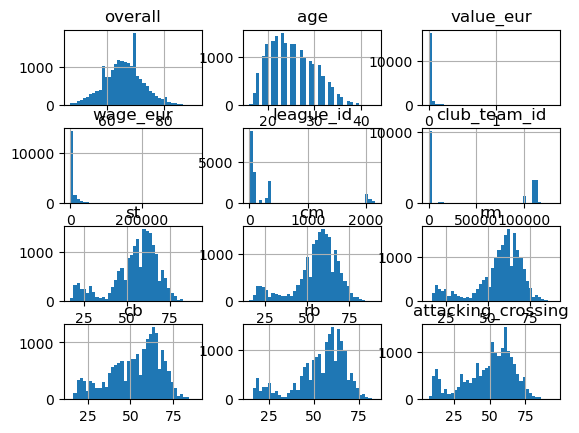

In [490]:
df.loc[ : , ["overall","age","value_eur","wage_eur","league_id","club_team_id","st","cm","rm","cb","rb","attacking_crossing"]].hist(bins=40)
# Note : ST,CM,RM,CB,RB follows approximately bell curve

<h1> Scaling  Data</h1>

<h6 style="color:red">Can nominal data be scaled  ?</h6>

In [491]:
import math
normalized_cols = []
standarized_cols = ["st","cm","rm","cb","rb","value_eur","wage_eur"] # generally for attributes that have bell curve or follow a normal distribution
scaled_cols = normalized_cols + (standarized_cols) 
for col in scaled_cols :

    min = df[col].min()
    max = df[col].max()
    mean = df[col].mean()
    std = math.pow(df[col].var(),0.5)
    if col in normalized_cols : 
        df[col] = (df[col] - min)/(max - min)
    elif col in standarized_cols : 
        df[col] = (df[col] - mean)/(std)
        




<h1 style="color:yellow"> Reducing number of attributes whose correlation with overall is less than the threshold</h1>

In [492]:
threshold = 0.2 # very low threshold 
corr_matrix = df.corr()
corr_with_target = corr_matrix["overall"]
cols_not_correlated = corr_with_target[ abs(corr_with_target)<=threshold ].index
cols_not_correlated

Index(['height_cm', 'weight_kg', 'league_level', 'club_position',
       'club_jersey_number', 'club_joined_date',
       'club_contract_valid_until_year', 'nationality_id', 'preferred_foot',
       'body_type', 'movement_balance', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed',
       'gk', 'work_rate_attacking', 'work_rate_defending'],
      dtype='object')

In [493]:
drop_cols( ['height_cm', 'club_position', 'preferred_foot', 'body_type',"body_type","weight_kg","league_level","club_jersey_number","club_joined_date"
           ,"club_contract_valid_until_year","movement_balance","gk"] )

 awww to drop is ['height_cm', 'club_position', 'preferred_foot', 'body_type', 'body_type', 'weight_kg', 'league_level', 'club_jersey_number', 'club_joined_date', 'club_contract_valid_until_year', 'movement_balance', 'gk']


In [494]:
df.shape

(18250, 47)

In [495]:
df.corr()

,overall,value_eur,wage_eur,age,club_team_id,league_id,nationality_id,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_curve,skill_fk_accuracy,skill_long_passing,movement_agility,movement_reactions,power_shot_power,power_jumping,power_stamina,power_strength,mentality_aggression,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,st,cm,rm,cb,rb,work_rate_attacking,work_rate_defending
overall,1.000000,0.554267,0.603468,0.448459,-0.212297,-0.219896,-0.184526,0.212350,0.337799,0.469771,0.207823,0.395097,0.503926,0.445796,0.309453,0.517150,0.392789,0.349738,0.533800,0.368632,0.410945,0.375203,0.518824,0.256361,0.874053,0.556934,0.567858,0.385807,0.365806,0.394631,0.355148,0.524221,0.335288,0.689730,-0.022038,-0.020804,-0.021205,-0.014013,-0.019570,0.019844,0.482874,0.545081,0.473661,0.410800,0.430582,0.162130,0.106254
value_eur,0.554267,1.000000,0.831595,0.033758,-0.170097,-0.113023,-0.070984,0.147201,0.232511,0.657368,0.163929,0.243088,0.296125,0.280605,0.144892,0.218335,0.224509,0.168514,0.305003,0.230831,0.246178,0.208095,0.292398,0.168851,0.495463,0.300843,0.244191,0.197421,0.131279,0.186180,0.222500,0.328170,0.188081,0.380804,-0.029394,-0.028768,-0.026314,-0.027479,-0.026479,-0.013900,0.284870,0.314105,0.287508,0.196399,0.227562,0.122216,0.069223
wage_eur,0.603468,0.831595,1.000000,0.142590,-0.223577,-0.162491,-0.079922,0.161858,0.236837,0.671924,0.143481,0.257494,0.323260,0.294678,0.179208,0.260371,0.251985,0.205427,0.332587,0.249689,0.274180,0.231385,0.324371,0.160992,0.546101,0.344087,0.286844,0.202722,0.170486,0.230386,0.235159,0.353835,0.207917,0.434754,-0.026101,-0.024471,-0.021816,-0.023574,-0.023171,-0.002387,0.306060,0.342528,0.304311,0.236171,0.257365,0.117129,0.082418
age,0.448459,0.033758,0.142590,1.000000,0.075261,0.054264,0.039783,0.057824,0.048916,0.213598,-0.124082,0.127596,0.159623,0.058521,0.149490,0.415030,0.127339,0.158159,0.154681,0.141637,0.142046,0.182080,0.198780,-0.014037,0.418080,0.275323,0.345523,0.155583,0.355684,0.233668,0.092760,0.200668,0.147102,0.344766,0.103252,0.107851,0.105819,0.114102,0.103570,0.142730,0.143800,0.178532,0.103517,0.205177,0.152211,-0.005511,0.086314
club_team_id,-0.212297,-0.170097,-0.223577,0.075261,1.000000,0.377083,0.265777,-0.095248,-0.070023,-0.132261,-0.049204,-0.076970,-0.107290,-0.108709,-0.061767,-0.098403,-0.080320,-0.065494,-0.112562,-0.085065,-0.106272,-0.053500,-0.112282,-0.059788,-0.193878,-0.133195,-0.113740,-0.045902,-0.060604,-0.095718,-0.063525,-0.132563,-0.039699,-0.174185,-0.013169,-0.010270,-0.011586,-0.009128,-0.009227,-0.019606,-0.100273,-0.116565,-0.102837,-0.083041,-0.086552,-0.067225,-0.053129
league_id,-0.219896,-0.113023,-0.162491,0.054264,0.377083,1.000000,0.244980,-0.033711,-0.066259,-0.090783,-0.028549,-0.079764,-0.111463,-0.103494,-0.062356,-0.084616,-0.083542,-0.068342,-0.120954,-0.080335,-0.110088,-0.065991,-0.119782,-0.029569,-0.178735,-0.149420,-0.103478,-0.024588,-0.051827,-0.094512,-0.064185,-0.117783,-0.058735,-0.195174,-0.009985,-0.009127,-0.011693,-0.009686,-0.010821,-0.017063,-0.097742,-0.114789,-0.097552,-0.082132,-0.082410,-0.056717,-0.051861
nationality_id,-0.184526,-0.070984,-0.079922,0.039783,0.265777,0.244980,1.000000,-0.010198,-0.009462,-0.063337,0.046116,-0.045071,-0.075977,-0.045529,-0.047509,-0.046743,-0.049323,-0.050048,-0.092684,-0.039379,-0.058349,-0.050259,-0.084190,0.030187,-0.165164,-0.106015,-0.060438,0.011313,-0.034848,-0.032729,-0.010583,-0.069697,-0.047052,-0.122629,-0.035372,-0.036805,-0.035175,-0.036516,-0.037060,-0.032068,-0.050380,-0.070957,-0.045617,-0.056094,-0.048605,-0.010999,-0.015854
weak_foot,0.212350,0.147201,0.161858,0.057824,-0.095248,-0.033711,-0.010198,1.000000,0.341664,0.136333,0.257515,0.369423,0.338743,0.353689

In [496]:
df

,overall,value_eur,wage_eur,age,club_team_id,league_id,nationality_id,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_curve,skill_fk_accuracy,skill_long_passing,movement_agility,movement_reactions,power_shot_power,power_jumping,power_stamina,power_strength,mentality_aggression,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,st,cm,rm,cb,rb,work_rate_attacking,work_rate_defending
0,91,23.623864,11.824554,24,73.0,16.0,18,4,5,5,97.0,90.0,80.0,92.0,36.0,78.0,78,73,86,84,80,69,71,93,93,90,88,88,77,64,93,83,84,88.0,13,5,7,11,6,15.0,2.575918,1.915483,2.288917,0.084425,0.657030,2,0
1,91,24.086656,17.702837,22,10.0,13.0,36,3,3,5,89.0,93.0,66.0,80.0,45.0,88.0,47,83,77,90,77,62,53,76,94,94,93,76,93,87,96,74,84,87.0,7,14,13,11,7,15.0,2.575918,1.389974,1.582639,0.619158,0.446103,2,1
2,91,13.244102,18.237226,32,10.0,13.0,7,5,4,5,72.0,88.0,94.0,87.0,65.0,78.0,95,55,94,83,92,83,94,74,92,92,72,88,74,75,88,95,83,88.0,15,13,5,10,13,15.0,2.063483,2.591136,2.218290,1.153891,1.500739,2,1
3,90,5.046074,0.762694,36,112893.0,39.0,52,4,4,5,80.0,87.0,90.0,94.0,33.0,64.0,83,60,91,86,93,93,90,91,88,83,71,70,68,44,91,92,75,96.0,6,11,15,14,8,15.0,2.209893,2.215773,2.288917,-0.249782,0.375793,0,0
4,90,6.368336,4.610297,35,607.0,350.0,18,4,4,5,79.0,88.0,83.0,87.0,39.0,78.0,75,90,89,88,82,73,76,77,92,87,85,82,82,63,92,90,85,90.0,13,11,5,5,7,15.0,2.429508,1.990555,2.077034,0.151267,0.446103,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,47,-0.361981,-0.439682,20,114168.0,2149.0,159,3,2,1,60.0,25.0,25.0,28.0,47.0,61.0,23,42,27,27,23,26,20,43,40,39,62,56,68,47,20,28,34,39.0,15,7,14,6,8,15.0,-1.596761,-1.988293,-1.807495,-0.383466,-0.749152,1,1
18246,47,-0.361981,-0.412963,21,114628.0,2012.0,155,3,2,1,55.0,28.0,31.0,33.0,51.0,47.0,26,45,32,30,32,26,25,46,45,36,36,56,44,46,28,38,38,46.0,8,13,9,6,7,15.0,-1.450351,-1.537857,-1.524984,-0.383466,-0.538225,1,1
18247,47,-0.361981,-0.359524,19,111724.0,2012.0,155,2,2,1,68.0,46.0,38.0,46.0,16.0,45.0,32,41,44,37,31,34,31,57,49,44,40,54,46,34,43,42,61,40.0,12,6,7,10,8,15.0,-0.571893,-1.162494,-0.748078,-1.720297,-1.452243,1,0
18248,47,-0.363303,-0.412963,21,112163.0,2012.0,155,3,2,1,57.0,37.0,46.0,46.0,38.0,57.0,36,42,54,36,34,35,50,60,44,44,48,59,60,50,53,46,40,39.0,7,7,13,12,14,15.0,-0.718302,-0.636986,-0.677450,-0.583990,-0.608534,1,1


<h1> FSS Techniques </h1>

In [503]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, mutual_info_classif, f_classif
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn_genetic import GAFeatureSelectionCV
import random



In [498]:
def variance_threshold_selector(X, threshold=0.0):
    selector = VarianceThreshold(threshold)
    selector.fit(X)
    return X.columns[selector.get_support(indices=True)]

In [499]:
print(df["league_id"].var())

376766.28782206244


In [500]:
print(df["league_id"].value_counts())
league_ids = sorted(df["league_id"].unique()) # Nationality Ids values are not very separated from each other

k = len(league_ids)
i = 1
list_ids = []
map = {}
while i<=k :
    list_ids.append(i)
    i=i+1
for val in df["league_id"].unique() :
    rand_id = random.choice(list_ids)
    map[val] = rand_id
    list_ids.remove(rand_id)
df["league_id"].replace(map,inplace=True)   
print(df["league_id"].value_counts())
# IDS have very distinct values tha

league_id
39.0      841
353.0     808
14.0      696
60.0      638
61.0      636
13.0      623
54.0      611
53.0      596
31.0      562
32.0      545
68.0      544
17.0      540
2076.0    537
19.0      527
350.0     524
20.0      513
10.0      501
16.0      500
308.0     495
66.0      478
2012.0    447
330.0     430
4.0       426
56.0      421
41.0      407
83.0      335
189.0     332
80.0      323
50.0      315
2149.0    313
351.0     289
1.0       288
7.0       280
65.0      271
336.0     195
2018.0    174
335.0     171
337.0     168
2020.0    165
2019.0    153
2017.0    136
338.0     114
63.0       84
319.0      79
332.0      56
317.0      54
318.0      28
64.0       28
322.0      28
2013.0     25
Name: count, dtype: int64
league_id
49.0    841
21.0    808
47.0    696
30.0    638
19.0    636
24.0    623
31.0    611
13.0    596
40.0    562
32.0    545
42.0    544
36.0    540
14.0    537
10.0    527
25.0    524
41.0    513
48.0    501
7.0     500
15.0    495
16.0    478
17.0    447
1.

In [501]:
df["league_id"].var() # compared with previous values it was 376766.28782206244

189.26986559894772

In [518]:
def variance_threshold_selector(X, threshold=0.0):
    selector = VarianceThreshold(threshold)
    selector.fit(X)
    return X.columns[selector.get_support(indices=True)]

In [515]:
def correlation_selector(X, threshold=0.8):
    corr_matrix = X.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return to_drop

In [ ]:
def chi_squared_selector(X, y, top_k=4):
    selector = SelectKBest(y, k=top_k)
    selector.fit(X,selector)
    return X[X.columns[selector.get_support(indices=True)]]

In [ ]:
# Feature selection using mutual information
def mutual_info_selector(mutual_info_classif,X , top_k=4):
    selector = SelectKBest(mutual_info_classif, k=top_k)
    selector.fit(X,mutual_info_classif)
    return X[X.columns[selector.get_support(indices=True)]]

In [504]:
def information_gain_selector(X, y, top_k=4):
    selector = SelectKBest(score_func=mutual_info_classif, k=top_k)
    X_selected = selector.fit_transform(X, y)
    return X.columns[selector.get_support(indices=True)]

In [517]:
correlation_selector(df.iloc[ : , 1 : ],0.7)

['wage_eur',
 'shooting',
 'passing',
 'dribbling',
 'attacking_crossing',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'movement_agility',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'mentality_aggression',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes',
 'goalkeeping_speed',
 'st',
 'cm',
 'rm',
 'cb',
 'rb']

In [510]:
information_gain_selector(df.iloc[ : , 1 : ] , df["overall"],top_k=5)

/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and

Index(['value_eur', 'movement_reactions', 'cm', 'rm', 'rb'], dtype='object')